# TellCo Financial Analysis

## Business Objective

### The investor wants to evaluate the potential purchase of TellCo, a telecom company. The goal is to analyze the customer data to uncover insights that will help determine the growth potential of the company and make recommendations on whether it should be purchased.

## Task 1 : User Overview Analysis

## Import Necessary Libraries

In [147]:
# Import the function from the script
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from db_connection import load_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

### Create a Database Connection(Postgres SQL) and Load Data

In [148]:
# Database connection parameters
db_config = {
    'user': 'postgres',
    'password': 'password',
    'host': 'localhost',
    'port': 5432,
    'database': 'tellco_db'
}

# Load data from the 'xdr_data' table
query = "SELECT * FROM xdr_data"
df = load_data(query, db_config)

# Display the first few rows of the DataFrame
df.head(10)


Connection to the database established successfully.
Database connection closed successfully.


Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
5  1.311448e+19  4/12/2019 21:37     439.0   4/25/2019 8:08   553.0   
6  1.311448e+19   4/13/2019 8:41     612.0   4/25/2019 8:16   168.0   
7  1.304243e+19   4/14/2019 2:11     592.0   4/25/2019 2:26   512.0   
8  1.311448e+19  4/14/2019 12:48     121.0  4/25/2019 10:22   960.0   
9  1.304243e+19   4/15/2019 0:32       0.0   4/25/2019 0:40   284.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   
5  1074638.0  2.082014e+14   3.366819e+10  3.529841e+13   
6  1035261.0  2.082014e+14   3.366537e+10  8.676270e+13   
7   951292.0  2.082010e+14   3.376349e+10  8.654640e+13   
8   941634.0  2.082014e+14   3.369874e+10  3.556241e+13   
9   864482.0  2.082003e+14   3.365922e+10  3.557311e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   
2                D42335A  ...          19725661.0          14699576.0   
3                T21824A  ...          21388122.0          15146643.0   
4                D88865A  ...          15259380.0          18962873.0   
5                T89132C  ...          21332918.0           2611113.0   
6  9.16456701058919E+015  ...           7234465.0           1886295.0   
7   CELL_208_20_520025_1  ...          12189786.0          19735183.0   
8                T42084A  ...          18436641.0          10860867.0   
9                L20434C  ...          16338345.0           6573194.0   

   Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  \
0           8198936.0           9656251.0        278082303.0   
1          18338413.0          17227132.0        608750074.0   
2          17587794.0           6163408.0        229584621.0   
3          13994646.0           1097942.0        799538153.0   
4          17124581.0            415218.0        527707248.0   
5           7345361.0           6536448.0        710293538.0   
6          13231006.0          17981760.0         44796223.0   
7           6858496.0          12075206.0        748906189.0   
8          10587264.0           8467177.0        821671285.0   
9          12211149.0            974201.0        811355188.0   

   Gaming UL (Bytes)  Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  \
0         14344150.0       171744450.0         8814393.0        36749741.0   
1          1170709.0       526904238.0        15055145.0        53800391.0   
2           395630.0       410692588.0         4215763.0        27883638.0   
3         10849722.0       749039933.0        12797283.0        43324218.0   
4          3529801.0       550709500.0        13910322.0        38542814.0   
5         13167974.0       654978277.0         4436057.0        30307754.0   
6         14084934.0       803653557.0        10649768.0        47925246.0   
7         16149622.0       537601820.0         7714657.0        58813016.0   
8          6548349.0       172920486.0        14749031.0        42363146.0   
9          1591237.0        64856042.0        12815208.0        22417975.0   

   Total DL (Bytes)  
0       308879636.0  
1       653384965.0  
2       279807335.0  
3       846028530.0  
4       569138589.0  
5       754452212.0  
6        70562047.0  
7       775350343.0  
8       

#### Get Summary Statistics

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [150]:
# Convert 'Start' and 'End' columns to datetime format
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

print(df[['Start', 'End']].dtypes)

Start    datetime64[ns]
End      datetime64[ns]
dtype: object


In [151]:
df.describe()

Bearer Id                          Start       Start ms  \
count  1.490100e+05                         150000  150000.000000   
mean   1.013887e+19  2019-04-26 12:36:09.616800256     499.188200   
min    6.917538e+18            2019-04-04 12:01:00       0.000000   
25%    7.349883e+18            2019-04-25 00:26:00     250.000000   
50%    7.349883e+18            2019-04-26 08:51:00     499.000000   
75%    1.304243e+19            2019-04-27 18:18:15     749.000000   
max    1.318654e+19            2019-04-29 07:28:00     999.000000   
std    2.893173e+18                            NaN     288.611834   

                                 End         End ms     Dur. (ms)  \
count                         150000  150000.000000  1.500000e+05   
mean   2019-04-27 17:39:38.703200256     498.800880  1.046086e+05   
min              2019-04-24 22:59:00       0.000000  7.142000e+03   
25%              2019-04-26 07:30:00     251.000000  5.744050e+04   
50%              2019-04-27 23:02:00     500.000000  8.639900e+04   
75%              2019-04-29 07:15:00     750.000000  1.324302e+05   
max              2019-04-30 23:59:00     999.000000  1.859336e+06   
std                              NaN     288.097653  8.103762e+04   

               IMSI  MSISDN/Number          IMEI  Avg RTT DL (ms)  ...  \
count  1.494310e+05   1.489350e+05  1.494290e+05    122172.000000  ...   
mean   2.082016e+14   4.188282e+10  4.847455e+13       109.795706  ...   
min    2.040471e+14   3.360100e+10  4.400152e+11         0.000000  ...   
25%    2.082014e+14   3.365130e+10  3.546071e+13        32.000000  ...   
50%    2.082015e+14   3.366371e+10  3.572201e+13        45.000000  ...   
75%    2.082018e+14   3.368349e+10  8.611970e+13        70.000000  ...   
max    2.140743e+14   8.823971e+14  9.900120e+13     96923.000000  ...   
std    2.148809e+10   2.447443e+12  2.241637e+13       619.782739  ...   

       Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
count        1.500010e+05        1.500010e+05        1.500010e+05   
mean         1.163407e+07        1.100941e+07        1.162685e+07   
min          5.300000e+01        1.050000e+02        4.200000e+01   
25%          5.833501e+06        5.517965e+06        5.777156e+06   
50%          1.161602e+07        1.101345e+07        1.164222e+07   
75%          1.744852e+07        1.651556e+07        1.747048e+07   
max          2.325910e+07        2.201196e+07        2.325919e+07   
std          6.710569e+06        6.345423e+06        6.725218e+06   

       Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  \
count        1.500010e+05       1.500010e+05       1.500010e+05   
mean         1.100175e+07       4.220447e+08       8.288398e+06   
min          3.500000e+01       2.516000e+03       5.900000e+01   
25%          5.475981e+06       2.104733e+08       4.128476e+06   
50%          1.099638e+07       4.234081e+08       8.291208e+06   
75%          1.650727e+07       6.331742e+08       1.243162e+07   
max          2.201196e+07       8.434419e+08       1.655879e+07   
std          6.359490e+06       2.439675e+08       4.782700e+06   

       Other DL (Bytes)  Other UL (Bytes)  Total UL (Bytes)  Total DL (Bytes)  
count      1.500010e+05      1.500010e+05      1.500000e+05      1.500000e+05  
mean       4.211005e+08      8.264799e+06      4.112121e+07      4.546434e+08  
min        3.290000e+03      1.480000e+02      2.866892e+06      7.114041e+06  
25%        2.101869e+08      4.145943e+06      3.322201e+07      2.431068e+08  
50%        4.218030e+08      8.267071e+06      4.114331e+07      4.558411e+08  
75%        6.316918e+08      1.238415e+07      4.903424e+07      6.657055e+08  
max        8.434425e+08      1.655882e+07      7.833131e+07      9.029696e+08  
std        2.432050e+08      4.769004e+06      1.127639e+07      2.441429e+08  

[8 rows x 52 columns]

In [152]:
df.dtypes

Bearer Id                                          float64
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                               float64
MSISDN/Number                                      float64
IMEI                                               float64
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [153]:
print(df.columns)


Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [154]:
# import byte_to_mb_conversion
# from byte_to_mb_conversion import convert_bytes_to_mb
# # List of columns to convert from bytes to megabytes
# columns_to_convert = [
#     'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
#     'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
#     'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
#     'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
#     'Total DL (Bytes)', 'Total UL (Bytes)'
# ]
# # Apply the conversion function to the DataFrame
# df = convert_bytes_to_mb(df, columns_to_convert)
def convert_bytes_to_mb(df, columns):
    # Conversion factor from bytes to megabytes
    bytes_to_mb = 1024 * 1024
    
    # Iterate over each column and apply the conversion
    for col in columns:
        df[col] = df[col] / bytes_to_mb
        # Rename the column to include '(MB)'
        df.rename(columns={col: f"{col.replace('Bytes', 'MB')}"}, inplace=True)
    
    return df

# List of columns to convert from bytes to megabytes
columns_to_convert = [
    'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
    'Total DL (Bytes)', 'Total UL (Bytes)'
]

# Apply the conversion function to the DataFrame
df = convert_bytes_to_mb(df, columns_to_convert)


In [155]:
print(df.columns)

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (MB)', 'HTTP UL (MB)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
      

#### Check for Missing Values

In [156]:
import missing_values_handler

from missing_values_handler import missing_values_summary

print(missing_values_summary(df))

                                          Missing Values  Percentage
Nb of sec with 37500B < Vol UL                    130254   86.835421
Nb of sec with 6250B < Vol UL < 37500B            111843   74.561503
Nb of sec with 125000B < Vol DL                    97538   65.024900
TCP UL Retrans. Vol (Bytes)                        96649   64.432237
Nb of sec with 31250B < Vol DL < 125000B           93586   62.390251
Nb of sec with 1250B < Vol UL < 6250B              92894   61.928920
Nb of sec with 6250B < Vol DL < 31250B             88317   58.877607
TCP DL Retrans. Vol (Bytes)                        88146   58.763608
HTTP UL (MB)                                       81810   54.539636
HTTP DL (MB)                                       81474   54.315638
Avg RTT DL (ms)                                    27829   18.552543
Avg RTT UL (ms)                                    27812   18.541210
Last Location Name                                  1153    0.768662
MSISDN/Number                     

In [157]:
# List of columns with more than 54% missing values
columns_to_drop = [
    'Nb of sec with 37500B < Vol UL',
    'Nb of sec with 6250B < Vol UL < 37500B',
    'Nb of sec with 125000B < Vol DL',
    'TCP UL Retrans. Vol (Bytes)',
    'Nb of sec with 31250B < Vol DL < 125000B',
    'Nb of sec with 1250B < Vol UL < 6250B',
    'Nb of sec with 6250B < Vol DL < 31250B',
    'TCP DL Retrans. Vol (Bytes)',
    'HTTP UL (MB)',
    'HTTP DL (MB)'
]

df.drop(columns=columns_to_drop, inplace=True)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       149010 non-null  float64       
 1   Start                           150000 non-null  datetime64[ns]
 2   Start ms                        150000 non-null  float64       
 3   End                             150000 non-null  datetime64[ns]
 4   End ms                          150000 non-null  float64       
 5   Dur. (ms)                       150000 non-null  float64       
 6   IMSI                            149431 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            149429 non-null  float64       
 9   Last Location Name              148848 non-null  object        
 10  Avg RTT DL (ms)                 122172 non-null  float64

### Drop rows with identifyer missing value

In [159]:
# List of columns to check for missing values
columns_to_check = ['IMSI', 'MSISDN/Number']
df.dropna(subset=columns_to_check, inplace=True)



In [160]:
df.isnull().sum()

Bearer Id                           429
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                         0
IMEI                                  0
Last Location Name                  589
Avg RTT DL (ms)                   27644
Avg RTT UL (ms)                   27625
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 720
50 Kbps < DL TP < 250 Kbps (%)      720
250 Kbps < DL TP < 1 Mbps (%)       720
DL TP > 1 Mbps (%)                  720
UL TP < 10 Kbps (%)                 767
10 Kbps < UL TP < 50 Kbps (%)       767
50 Kbps < UL TP < 300 Kbps (%)      767
UL TP > 300 Kbps (%)                767
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Dur. (ms).1                           0


### Visualize Missing Data

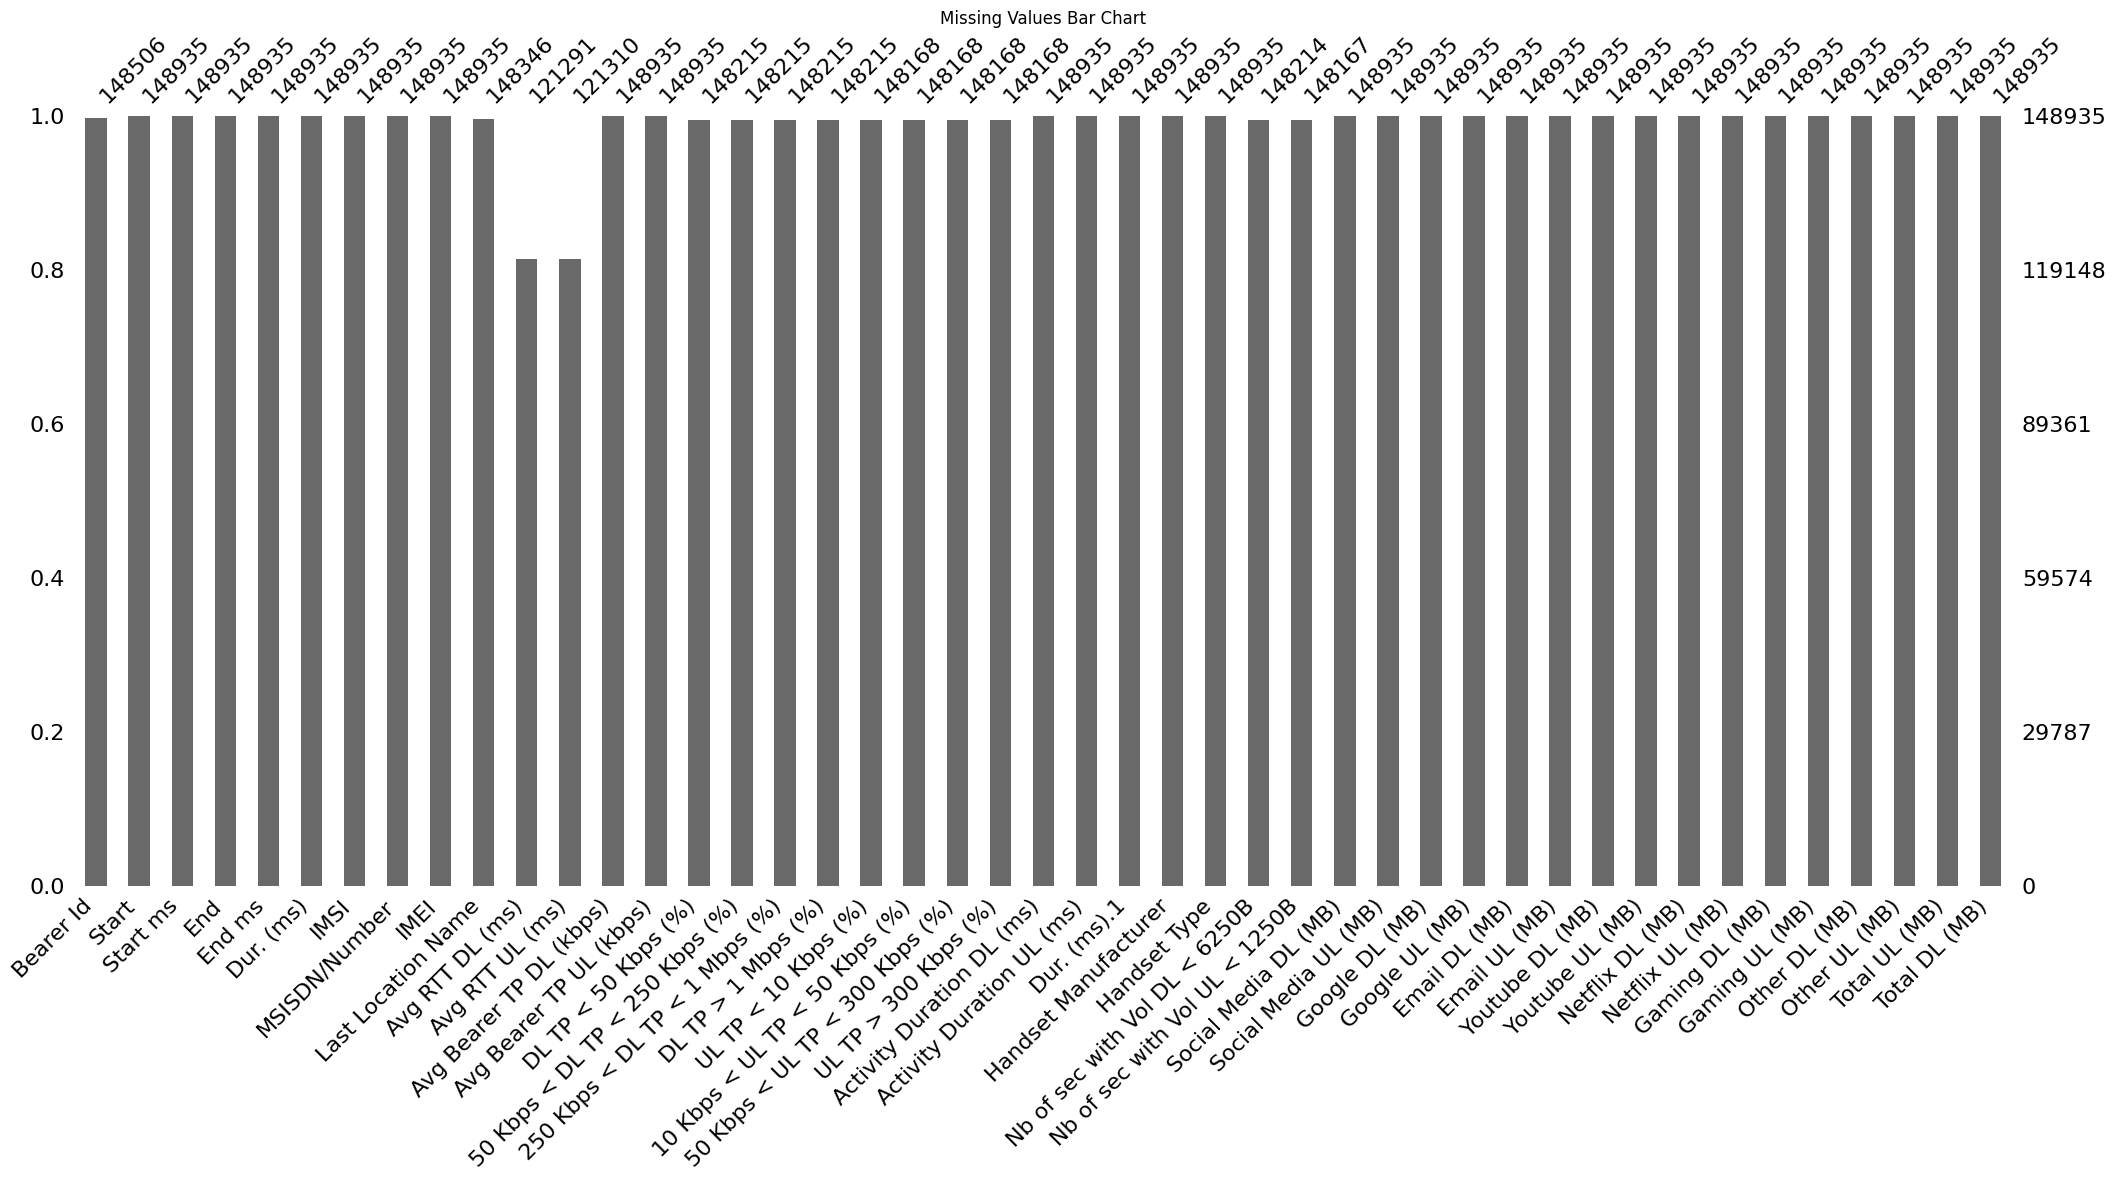

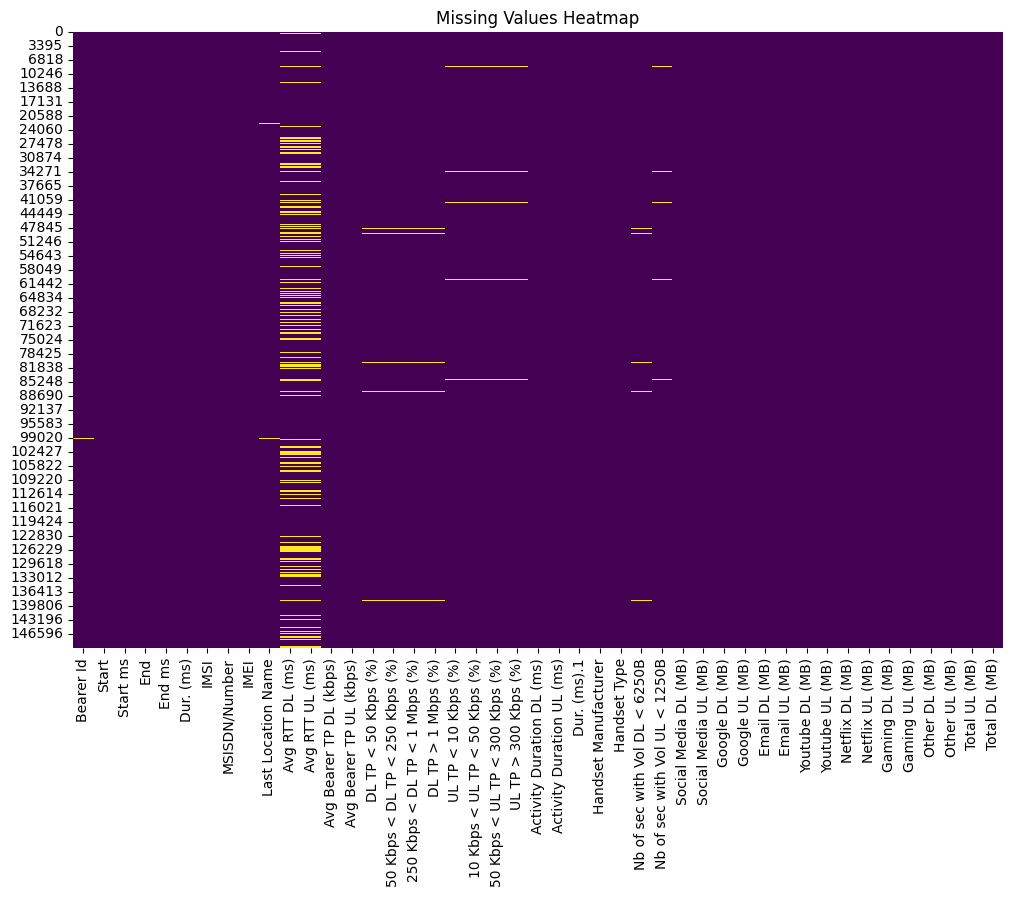

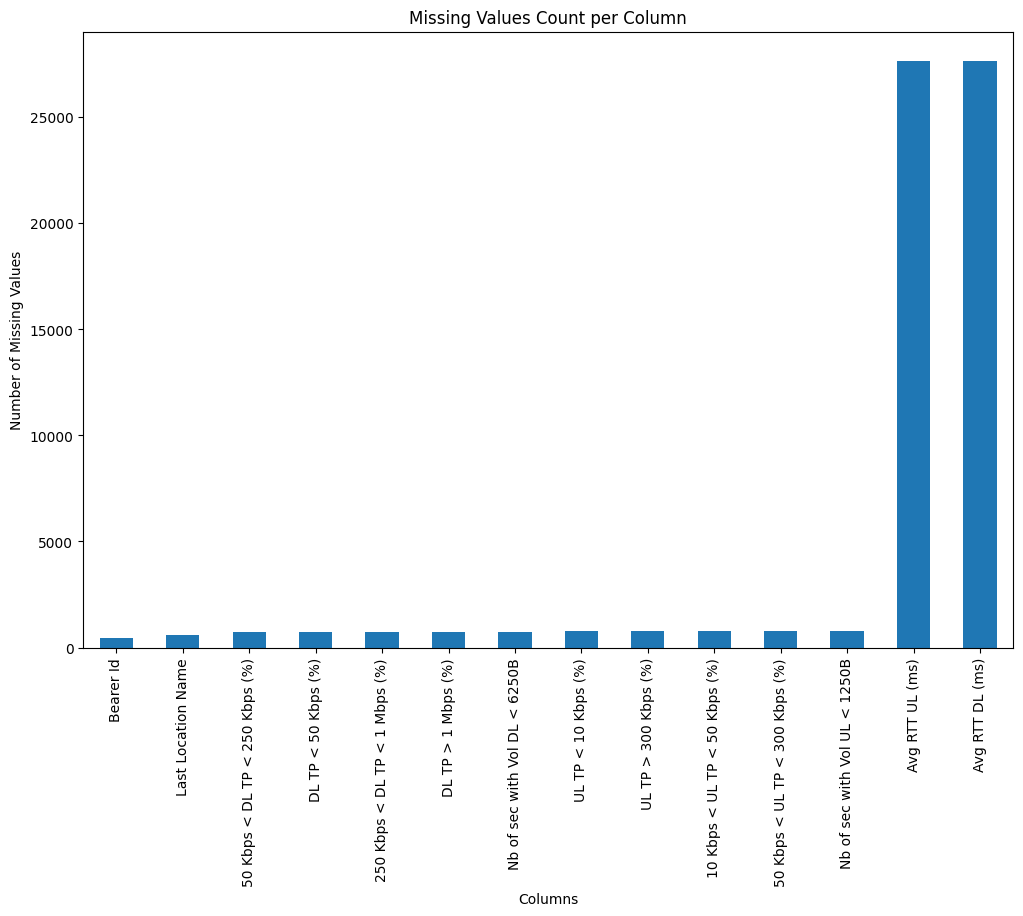

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.show()

# Heatmap of missing values using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Count of missing values per column
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

# Bar plot of missing values
plt.figure(figsize=(12, 8))
missing_values.plot(kind='bar')
plt.title('Missing Values Count per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.show()


## Handling Missing Values

In [162]:
import importlib
import missing_values_handler
importlib.reload(missing_values_handler)
# Import the necessary functions
from missing_values_handler import handle_missing_numerical, handle_missing_categorical, handle_missing_others,handle_missing_text,handle_missing_dates
# Handle missing values
df = handle_missing_numerical(df, strategy='mean')
df = handle_missing_categorical(df, strategy='most_frequent')
df = handle_missing_others(df, fill_value=0)
df = handle_missing_text(df, fill_value='Unknown')
# Handle missing values in date columns using 'mean' strategy
df = handle_missing_dates(df, strategy='mean')


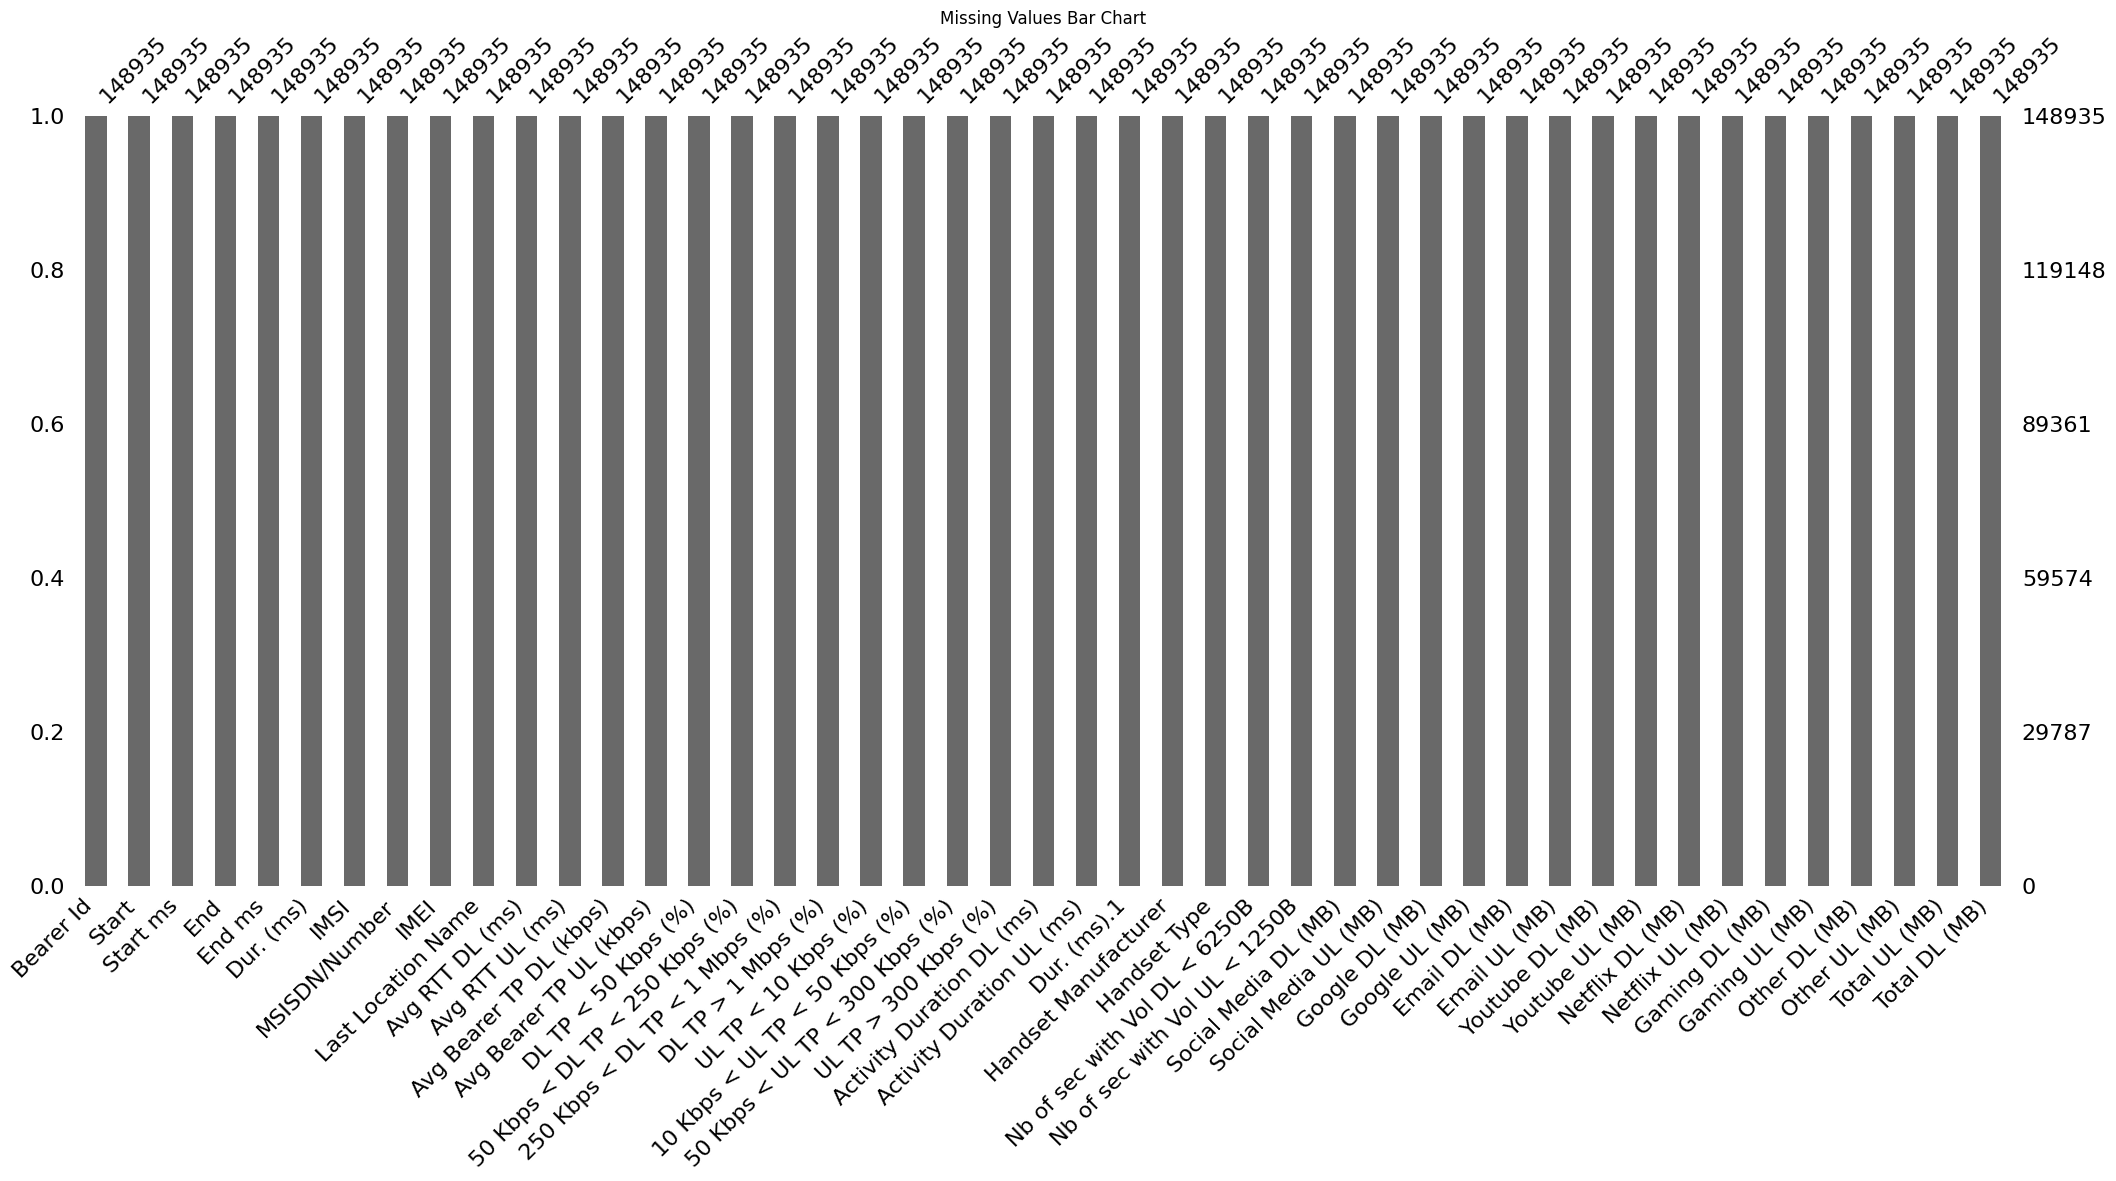

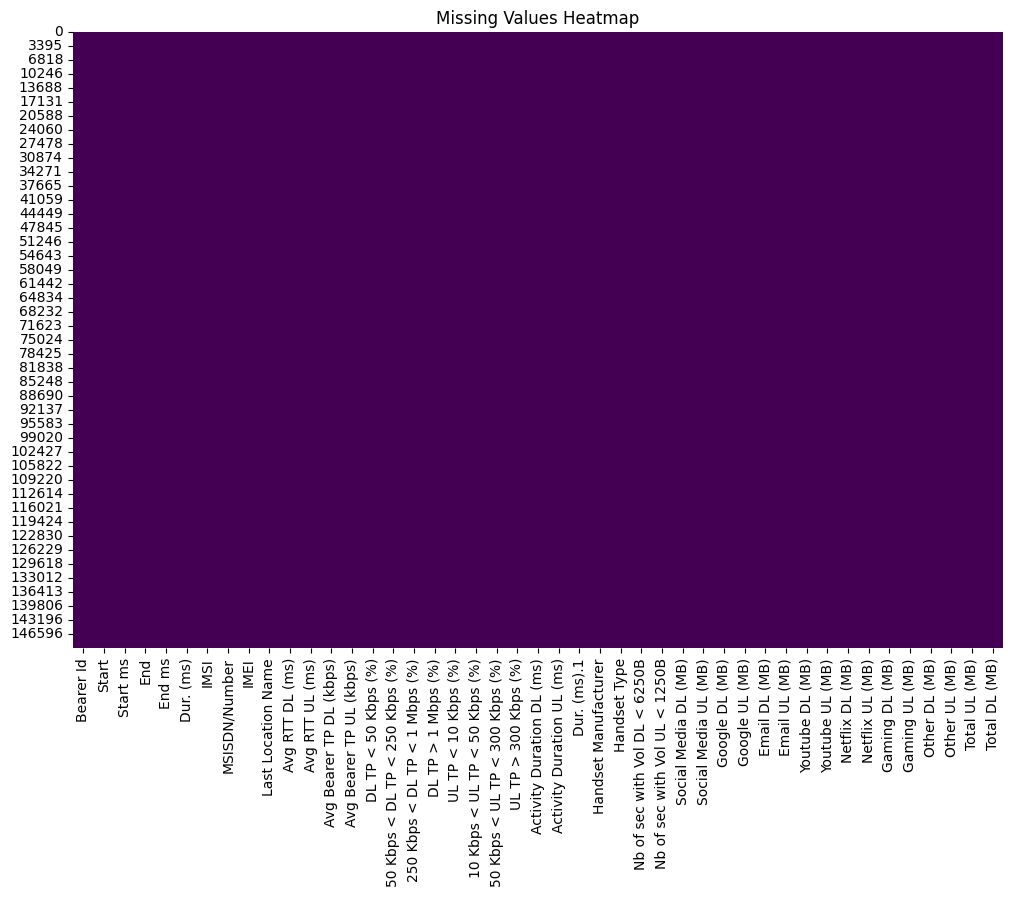

In [163]:
#  check the missing values again
df.isnull().sum()
msno.bar(df)
plt.title('Missing Values Bar Chart')
plt.show()

# Heatmap of missing values using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()




## Identify and Handle Outliers

In [164]:
import pandas as pd
import importlib
import outliers_handler
importlib.reload(outliers_handler)
from outliers_handler import handle_outliers_numerical, handle_outliers_text, handle_outliers_dates


# Handle numerical outliers
df_cleaned = handle_outliers_numerical(df, method='iqr', factor=1.5)


# Handle text outliers (e.g., invalid or unknown values)
df_cleaned = handle_outliers_text(df)

# Handle datetime outliers (cap future dates to 'now' and past dates to '1970-01-01')
df_cleaned = handle_outliers_dates(df, future_cap='now', past_cap='1970-01-01')
# Now df should be cleaned from outliers
df_cleaned.head()


Bearer Id               Start  Start ms                 End  End ms  \
0  1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   662.0   
1  1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   606.0   
2  1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   652.0   
3  1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   171.0   
4  1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  244924.75  2.082014e+14   3.366496e+10  3.552121e+13   
1  244924.75  2.082019e+14   3.368185e+10  3.579401e+13   
2  244924.75  2.082008e+14   3.373178e+10  3.528151e+13   
3  244924.75  2.082014e+14   3.373178e+10  3.535661e+13   
4  244924.75  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (MB)  Youtube UL (MB)  \
0  9.16456699548519E+015  ...        15.120135         2.385456   
1                L77566A  ...        19.309421        18.226365   
2                D42335A  ...        18.811856        14.018608   
3                T21824A  ...        20.397303        14.444964   
4                D88865A  ...        14.552479        18.084405   

   Netflix DL (MB)  Netflix UL (MB)  Gaming DL (MB)  Gaming UL (MB)  \
0         7.819115         9.208919      265.199950       13.679647   
1        17.488873        16.429073      580.549311        1.116475   
2        16.773027         5.877884      218.948956        0.377302   
3        13.346334         1.047079      762.499002       10.347101   
4        16.331273         0.395983      503.260849        3.366281   

   Other DL (MB)  Other UL (MB)  Total UL (MB)  Total DL (MB)  
0     163.788271       8.406060      35.047284     294.570576  
1     502.495039      14.357705      51.308051     623.116460  
2     391.666973       4.020465      26.591909     266.845069  
3     714.340146      12.204440      41.317194     806.835680  
4     525.197506      13.265917      36.757292     542.772855  

[5 rows x 45 columns]

In [165]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148935 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       148935 non-null  float64       
 1   Start                           148935 non-null  datetime64[ns]
 2   Start ms                        148935 non-null  float64       
 3   End                             148935 non-null  datetime64[ns]
 4   End ms                          148935 non-null  float64       
 5   Dur. (ms)                       148935 non-null  float64       
 6   IMSI                            148935 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            148935 non-null  float64       
 9   Last Location Name              148935 non-null  object        
 10  Avg RTT DL (ms)                 148935 non-null  float64     

### Identify the Top 10 Handsets Used by Customers

In [166]:
# Top 10 most used handsets
top_10_handsets = df['Handset Type'].value_counts().head(10)

# Display the top 10 handsets
print(top_10_handsets)



Handset Type
Huawei B528S-23A                19727
Apple iPhone 6S (A1688)          9413
Apple iPhone 6 (A1586)           9012
undefined                        8931
Apple iPhone 7 (A1778)           6304
Apple iPhone Se (A1723)          5176
Apple iPhone 8 (A1905)           4985
Apple iPhone Xr (A2105)          4562
Samsung Galaxy S8 (Sm-G950F)     4480
Apple iPhone X (A1901)           3810
Name: count, dtype: int64


#### Visualize the Top 10 Handsets

Key Insight: Understanding the most popular handsets helps tailor marketing strategies, such as targeted promotions for users of those devices.

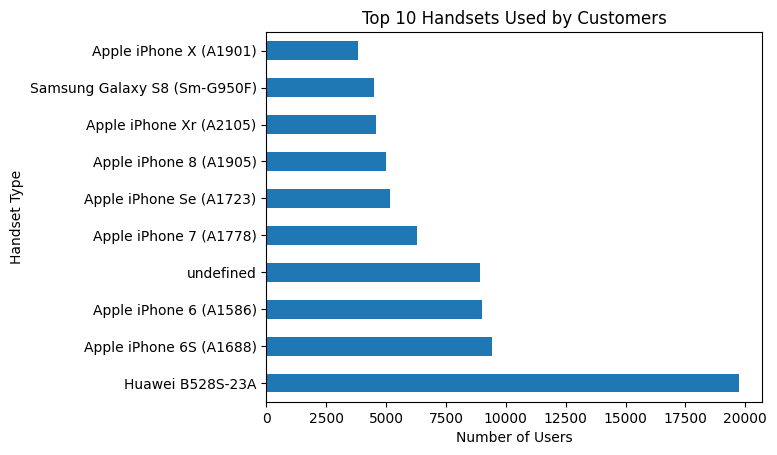

In [167]:
top_10_handsets.plot(kind='barh', title='Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.show()

### Identify the Top 3 Handset Manufacturers


Key Insight: Knowing the top manufacturers can guide partnership opportunities and marketing campaigns with those brands.

#### Aggregate Data to Find Top Manufacturers

In [168]:
top_manufacturers = df['Handset Manufacturer'].value_counts().head(3)
print(top_manufacturers)


Handset Manufacturer
Apple      59464
Samsung    40579
Huawei     34366
Name: count, dtype: int64


#### Visualize the Top 3 Manufacturers

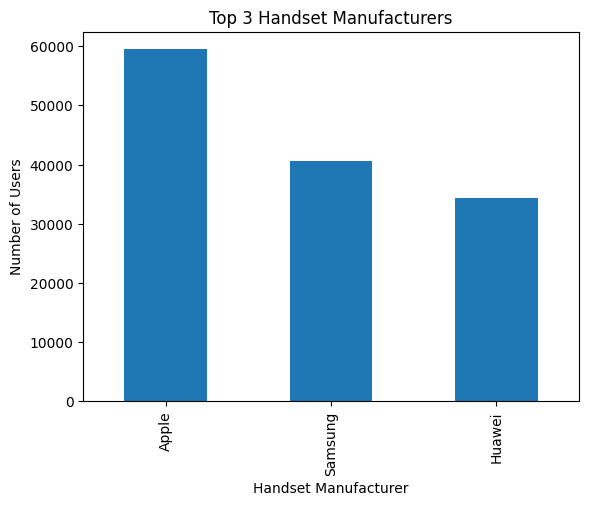

In [169]:
top_manufacturers.plot(kind='bar', title='Top 3 Handset Manufacturers')
plt.ylabel('Number of Users')
plt.show()


### Identify the Top 5 Handsets per Top 3 Manufacturers

Key Insights: This analysis helps understand which models are driving the most usage within each manufacturer’s product line, informing inventory and sales strategies.

#### Filter Data for Top 3 Manufacturers

In [170]:
top_manufacturers_list = top_manufacturers.index.tolist()
filtered_df = df[df['Handset Manufacturer'].isin(top_manufacturers_list)]


#### Find Top 5 Handsets for Each Manufacturer

In [171]:
top_handsets_per_manufacturer = filtered_df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)
print(top_handsets_per_manufacturer)


Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9413
                      Apple iPhone 6 (A1586)             9012
                      Apple iPhone 7 (A1778)             6304
                      Apple iPhone Se (A1723)            5176
                      Apple iPhone 8 (A1905)             4985
Huawei                Huawei B528S-23A                  19727
                      Huawei E5180                       2074
                      Huawei P20 Lite Huawei Nova 3E     2018
                      Huawei P20                         1479
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4480
                      Samsung Galaxy A5 Sm-A520F         3708
                      Samsung Galaxy J5 (Sm-J530)        3682
                      Samsung Galaxy J3 (Sm-J330)        3464
                      Samsung Galaxy S7 (Sm-G930X)       3176
Name: count, dtyp

#### Visualize the Results

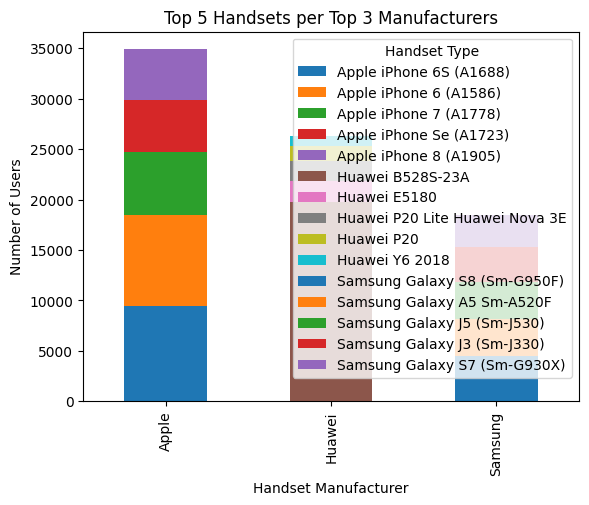

In [172]:
top_handsets_per_manufacturer.unstack().plot(kind='bar', stacked=True, title='Top 5 Handsets per Top 3 Manufacturers')
plt.ylabel('Number of Users')
plt.show()


In [173]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (MB)',
       'Social Media UL (MB)', 'Google DL (MB)', 'Google UL (MB)',
       'Email DL (MB)', 'Email UL (MB)', 'Youtube DL (MB)', 'Youtube UL (MB)',
       'Netflix DL (MB)', 'Netflix UL (MB)', 'Gaming DL (MB)',
       'Gaming UL (MB)', 'Other DL (MB)', 'Other UL (MB)', 'Total UL (MB)',
     

## Task 1.1: Aggregate User Behavior on Applications

Key Insight: Aggregating user behavior helps in identifying high-usage customers, who might be valuable for premium services or retention efforts.

#### Aggregate Data Per User (MSISDN)

In [132]:


# Convert session duration from milliseconds to minutes
df['Dur. (min)'] = df['Dur. (ms)'] / (1000 * 60)  # Duration in minutes

# 1. Number of xDR sessions per user
number_of_sessions = df.groupby('MSISDN/Number').agg(
    number_of_sessions=('Bearer Id', 'count')
).sort_values(by='number_of_sessions', ascending=False).head(10)
print("Top 10 Users by Number of Sessions:")
print(number_of_sessions)

# 2. Total session duration per user (in minutes)
total_session_duration = df.groupby('MSISDN/Number').agg(
    total_session_duration=('Dur. (min)', 'sum')
).sort_values(by='total_session_duration', ascending=False).head(10)
print("\nTop 10 Users by Total Session Duration (in minutes):")
print(total_session_duration)

# 3. Total download data per user (in MB)
total_download = df.groupby('MSISDN/Number').agg(
    total_download=('Total DL (MB)', 'sum')
).sort_values(by='total_download', ascending=False).head(10)
print("\nTop 10 Users by Total Download (in MB):")
print(total_download)

# 4. Total upload data per user (in MB)
total_upload = df.groupby('MSISDN/Number').agg(
    total_upload=('Total UL (MB)', 'sum')
).sort_values(by='total_upload', ascending=False).head(10)
print("\nTop 10 Users by Total Upload (in MB):")
print(total_upload)

# 5. Total data volume per user per application
application_data = df.groupby('MSISDN/Number').agg(
    social_media_download=('Social Media DL (MB)', 'sum'),
    social_media_upload=('Social Media UL (MB)', 'sum'),
    google_download=('Google DL (MB)', 'sum'),
    google_upload=('Google UL (MB)', 'sum'),
    email_download=('Email DL (MB)', 'sum'),
    email_upload=('Email UL (MB)', 'sum'),
    youtube_download=('Youtube DL (MB)', 'sum'),
    youtube_upload=('Youtube UL (MB)', 'sum'),
    netflix_download=('Netflix DL (MB)', 'sum'),
    netflix_upload=('Netflix UL (MB)', 'sum'),
    gaming_download=('Gaming DL (MB)', 'sum'),
    gaming_upload=('Gaming UL (MB)', 'sum'),
    other_download=('Other DL (MB)', 'sum'),
    other_upload=('Other UL (MB)', 'sum')
).sort_values(by='social_media_download', ascending=False).head(10)  # Sort by one metric
print("\nTop 10 Users by Social Media Download (in MB):")
print(application_data)


Top 10 Users by Number of Sessions:
               number_of_sessions
MSISDN/Number                    
3.373178e+10                23317
3.360300e+10                  813
3.362632e+10                   18
3.362578e+10                   17
3.361489e+10                   17
3.365973e+10                   16
3.367588e+10                   15
3.366716e+10                   13
3.360313e+10                   12
3.360452e+10                   12

Top 10 Users by Total Session Duration (in minutes):
               total_session_duration
MSISDN/Number                        
3.373178e+10             39402.150562
3.360300e+10              1268.984229
3.362578e+10                68.924400
3.362632e+10                66.746325
3.361489e+10                64.962625
3.365973e+10                58.178925
3.367588e+10                55.506475
3.366716e+10                51.866867
3.360313e+10                47.558654
3.362708e+10                46.343292

Top 10 Users by Total Download (in MB):
     

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_3172\395129842.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\zelalem.wubet\projects\personal\ten-academy\TellCo-Financial-Analysis\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


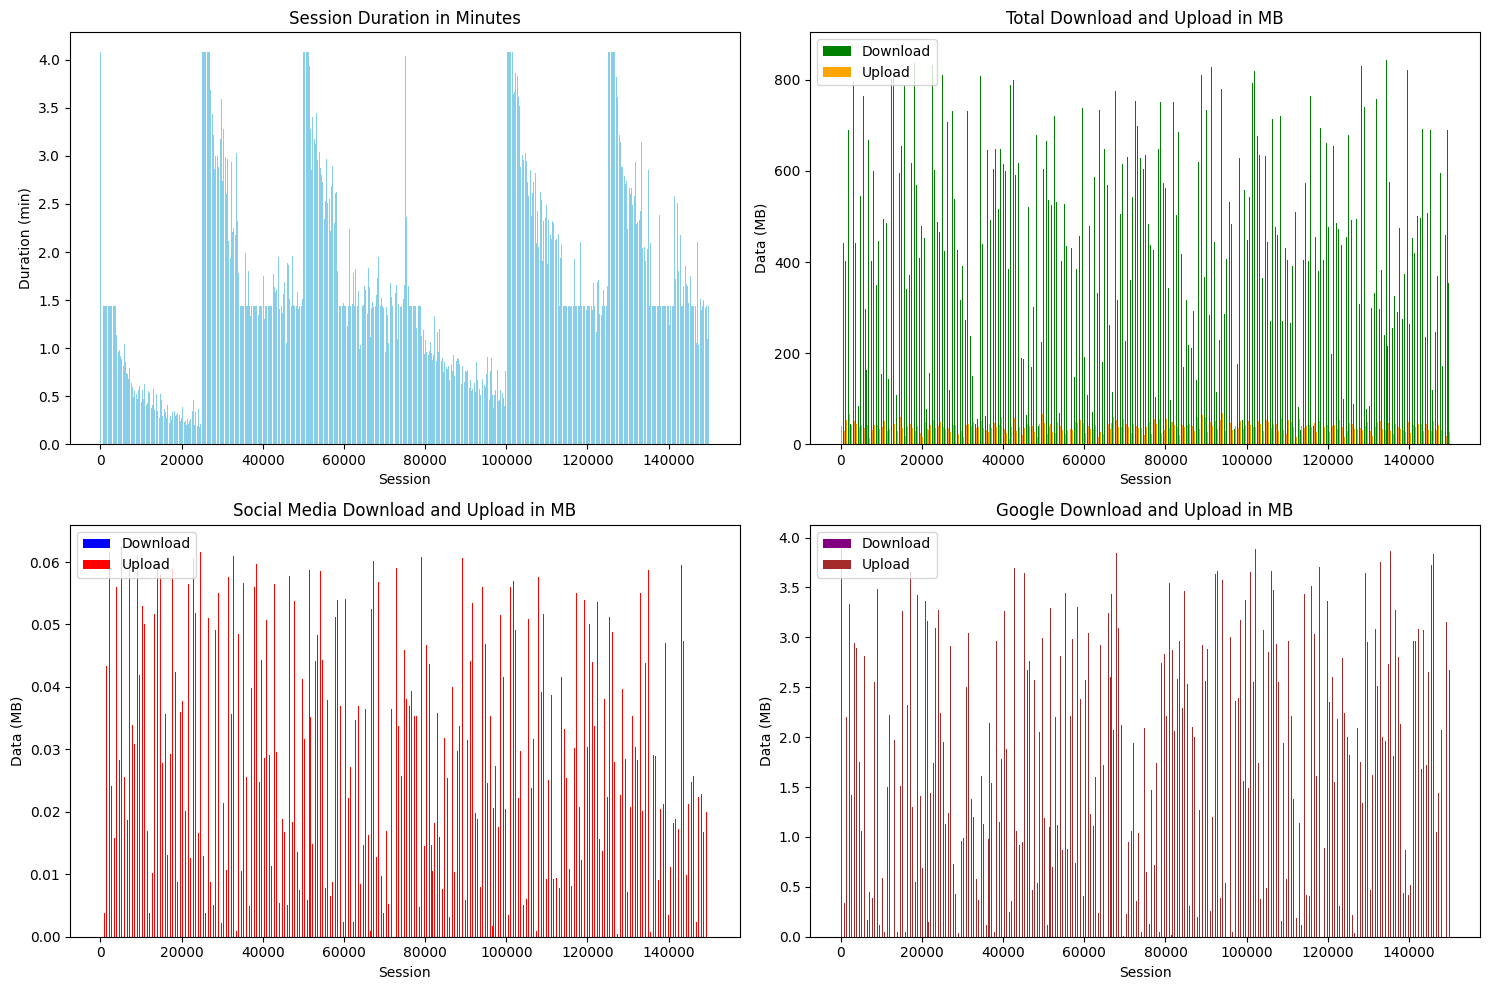

In [219]:
# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(15,10))

# Plot session duration in minutes
axs[0,0].bar(df.index, df['Dur. (min)'], color='skyblue')
axs[0,0].set_title('Session Duration in Minutes')
axs[0,0].set_xlabel('Session')
axs[0,0].set_ylabel('Duration (min)')

# Plot total download and upload in MB
axs[0,1].bar(df.index - 0.2, df['Total DL (MB)'], width=0.4, label='Download', color='green')
axs[0,1].bar(df.index + 0.2, df['Total UL (MB)'], width=0.4, label='Upload', color='orange')
axs[0,1].set_title('Total Download and Upload in MB')
axs[0,1].set_xlabel('Session')
axs[0,1].set_ylabel('Data (MB)')
axs[0,1].legend()

# Plot social media download and upload in MB
axs[1,0].bar(df.index - 0.2, df['Social Media DL (MB)'], width=0.4, label='Download', color='blue')
axs[1,0].bar(df.index + 0.2, df['Social Media UL (MB)'], width=0.4, label='Upload', color='red')
axs[1,0].set_title('Social Media Download and Upload in MB')
axs[1,0].set_xlabel('Session')
axs[1,0].set_ylabel('Data (MB)')
axs[1,0].legend()

# Plot Google download and upload in MB
axs[1,1].bar(df.index - 0.2, df['Google DL (MB)'], width=0.4, label='Download', color='purple')
axs[1,1].bar(df.index + 0.2, df['Google UL (MB)'], width=0.4, label='Upload', color='brown')
axs[1,1].set_title('Google Download and Upload in MB')
axs[1,1].set_xlabel('Session')
axs[1,1].set_ylabel('Data (MB)')
axs[1,1].legend()

plt.tight_layout()
plt.show()

### Bar Plot: Number of xDR Sessions per User

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_3172\2808428173.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=number_of_sessions.index, y=number_of_sessions['number_of_sessions'], palette="Blues_d")


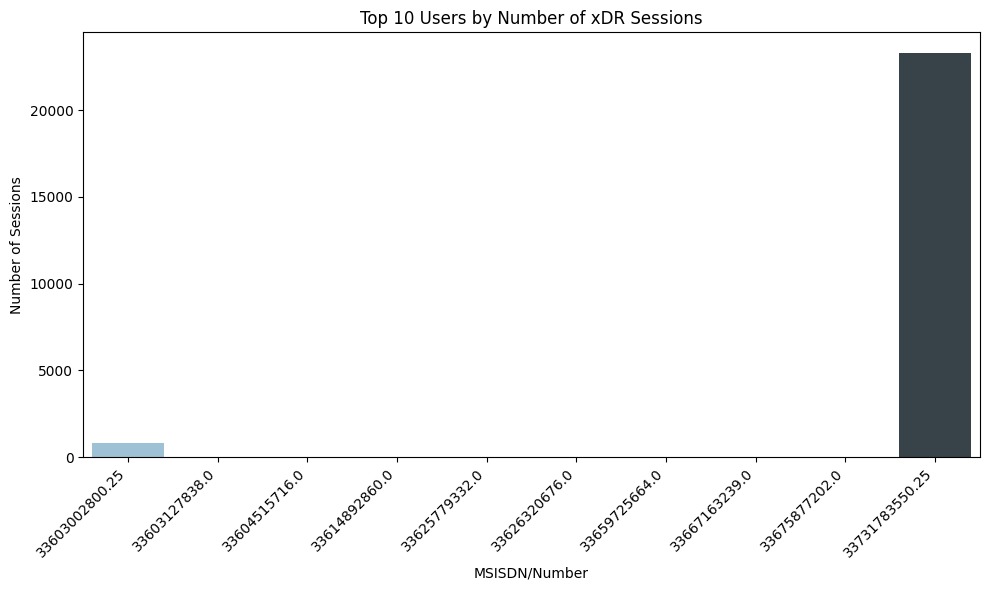

In [174]:
plt.figure(figsize=(10, 6))
sns.barplot(x=number_of_sessions.index, y=number_of_sessions['number_of_sessions'], palette="Blues_d")
plt.title('Top 10 Users by Number of xDR Sessions')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Bar Plot: Total Session Duration (in minutes)

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_3172\3515261102.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_session_duration.index, y=total_session_duration['total_session_duration'], palette="Greens_d")


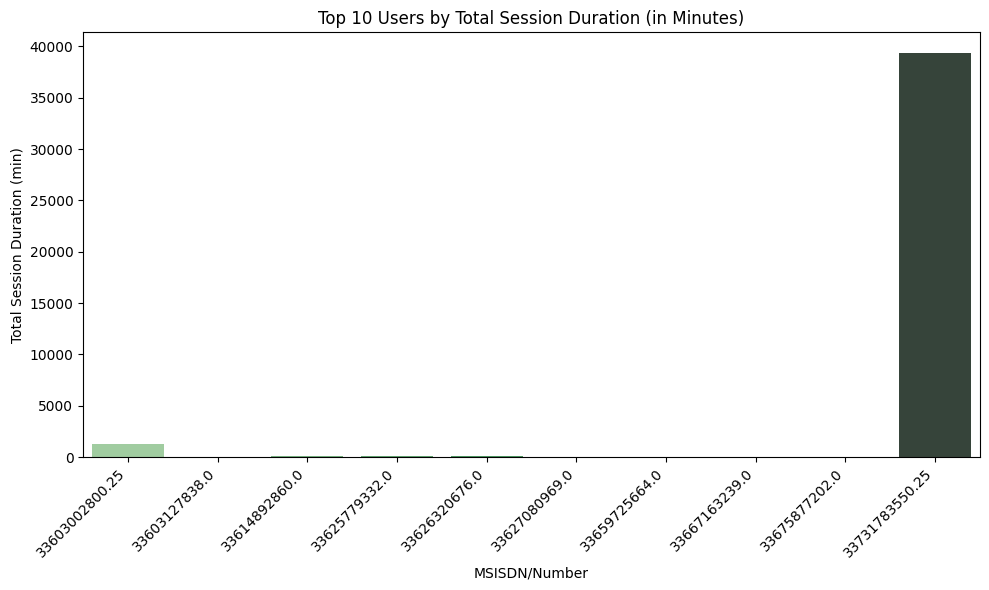

In [134]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_session_duration.index, y=total_session_duration['total_session_duration'], palette="Greens_d")
plt.title('Top 10 Users by Total Session Duration (in Minutes)')
plt.ylabel('Total Session Duration (min)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#####  Bar Plot: Total Download Volume (in MB)

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_3172\1618888222.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_download.index, y=total_download['total_download'], palette="Oranges_d")


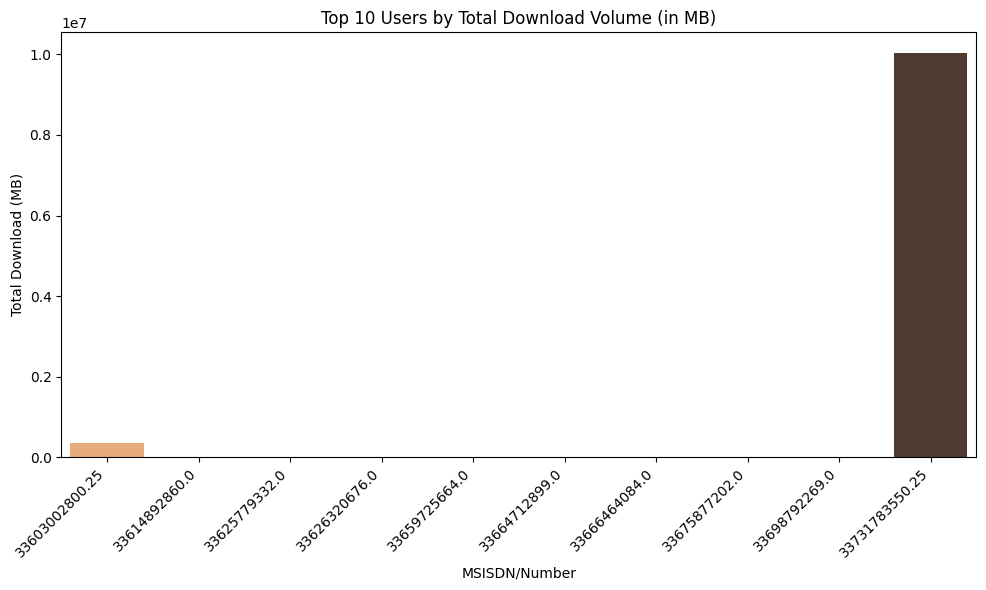

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_download.index, y=total_download['total_download'], palette="Oranges_d")
plt.title('Top 10 Users by Total Download Volume (in MB)')
plt.ylabel('Total Download (MB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Bar Plot: Total Upload Volume (in MB)

C:\Users\zelalem.wubet\AppData\Local\Temp\ipykernel_3172\28196155.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_upload.index, y=total_upload['total_upload'], palette="Reds_d")


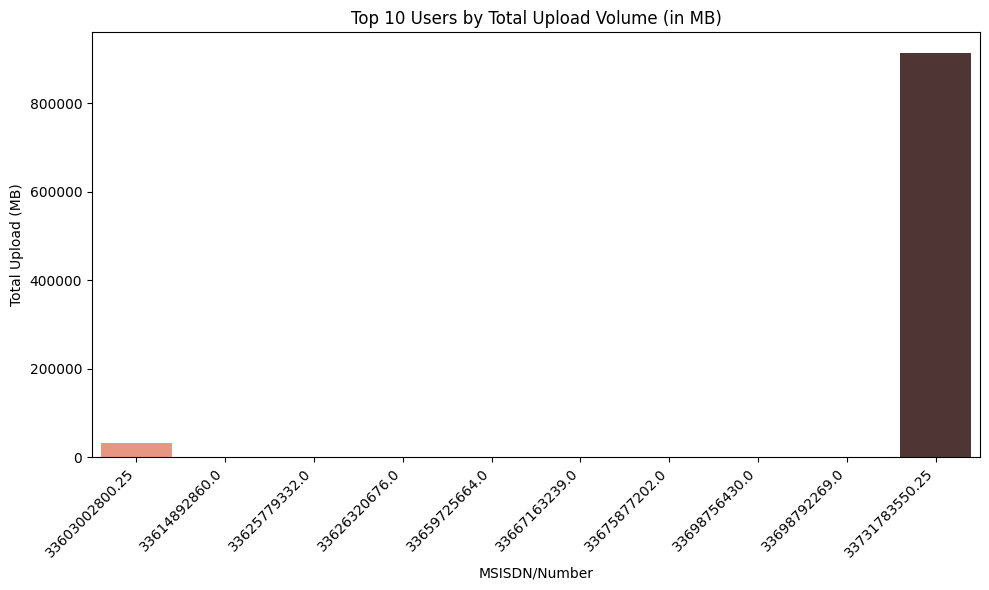

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(x=total_upload.index, y=total_upload['total_upload'], palette="Reds_d")
plt.title('Top 10 Users by Total Upload Volume (in MB)')
plt.ylabel('Total Upload (MB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Stacked Bar Plot: Total Data Volume (Download and Upload) for Each Application

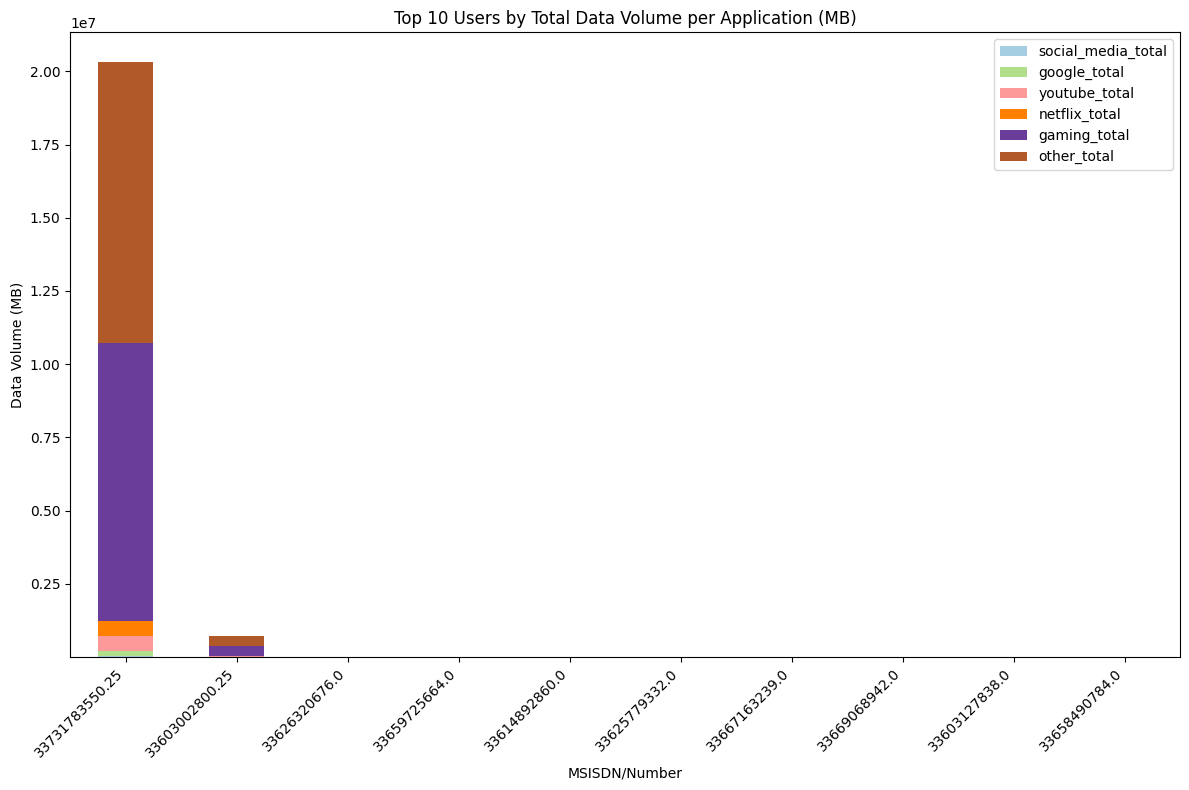

In [137]:
# Creating a combined column for total social media data (DL + UL)
application_data['social_media_total'] = application_data['social_media_download'] + application_data['social_media_upload']
application_data['google_total'] = application_data['google_download'] + application_data['google_upload']
application_data['youtube_total'] = application_data['youtube_download'] + application_data['youtube_upload']
application_data['netflix_total'] = application_data['netflix_download'] + application_data['netflix_upload']
application_data['gaming_total'] = application_data['gaming_download'] + application_data['gaming_upload']
application_data['other_total'] = application_data['other_download'] + application_data['other_upload']

# Plotting the stacked bar chart
application_data_plot = application_data[['social_media_total', 'google_total', 'youtube_total', 'netflix_total', 'gaming_total', 'other_total']]

application_data_plot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Paired')
plt.title('Top 10 Users by Total Data Volume per Application (MB)')
plt.ylabel('Data Volume (MB)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [138]:
# Aggregate per user the following information
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',  # Number of xDR sessions
    'Dur. (ms)': 'sum',  # Session duration
    'Total DL (MB)': 'sum',  # Total download data
    'Total UL (MB)': 'sum'  # Total upload data
}).rename(columns={
    'Bearer Id': 'xDR_sessions',
    'Dur. (ms)': 'Total_Duration',
    'Total DL (MB)': 'Total_DL',
    'Total UL (MB)': 'Total_UL'
})
# Calculate total data volume per user
user_behavior['Total_Volume'] = user_behavior['Total_DL'] + user_behavior['Total_UL']
# user_behavior.head()
# user_behavior.desribe
sorted_user_behavior = user_behavior.sort_values(by='Total_Volume', ascending=False)
print(sorted_user_behavior.head())

               xDR_sessions  Total_Duration      Total_DL       Total_UL  \
MSISDN/Number                                                              
3.373178e+10          23317    2.364129e+09  1.004627e+07  914270.648617   
3.360300e+10            813    7.613905e+07  3.589248e+05   31673.497143   
3.361489e+10             17    3.897758e+06  7.778877e+03     657.542230   
3.362578e+10             17    4.135464e+06  7.410091e+03     695.779209   
3.362632e+10             18    4.004780e+06  6.963269e+03     638.628694   

               Total_Volume  
MSISDN/Number                
3.373178e+10   1.096055e+07  
3.360300e+10   3.905983e+05  
3.361489e+10   8.436419e+03  
3.362578e+10   8.105870e+03  
3.362632e+10   7.601897e+03  


#### Visualize the Aggregated Data

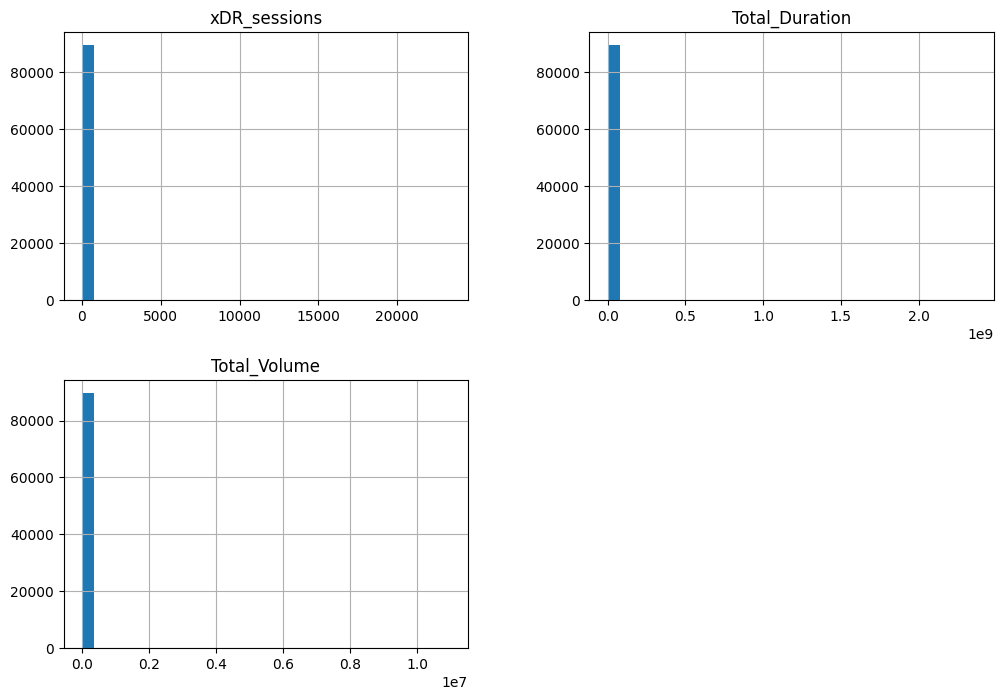

In [139]:
user_behavior[['xDR_sessions', 'Total_Duration', 'Total_Volume']].hist(bins=30, figsize=(12, 8))
plt.show()


## Task 1.2: Conduct Exploratory Data Analysis (EDA)

#### Variable Transformations: Segment Users by Duration

##### Segment Users into Deciles Based on Total Duration:

Key Insight: This analysis identifies which user segments contribute the most to data usage, which is crucial for network resource planning.

##### Segment Users into Top Five Decile Classes

In [187]:

# Convert session duration from milliseconds to minutes
df['Dur. (min)'] = df['Dur. (ms)'] / (1000 * 60)  # Duration in minutes

# Total data (DL + UL) in GB
df['Total Data (MB)'] = df['Total DL (MB)'] + df['Total UL (MB)']

# Calculate the total duration per user
user_duration = df.groupby('MSISDN/Number').agg(
    total_session_duration=('Dur. (min)', 'sum'),
    total_data=('Total Data (MB)', 'sum')
)

# Segment into deciles
user_duration['Decile'] = pd.qcut(user_duration['total_session_duration'], 5, labels=False) + 1

# Compute the total data per decile class
data_per_decile = user_duration.groupby('Decile').agg(
    total_data_per_decile_MB=('total_data', 'sum')
).sort_values(by='total_data_per_decile_MB', ascending=False)

print("Total Data (DL+UL) per Decile Class:")
print(data_per_decile)


Total Data (DL+UL) per Decile Class:
        total_data_per_decile_MB
Decile                          
5                   3.070423e+07
4                   1.113200e+07
2                   1.020949e+07
1                   9.228540e+06
3                   9.138800e+06


#### Visualize the Deciles

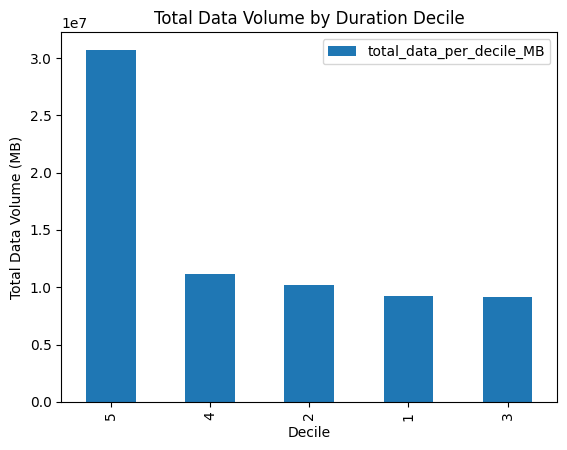

In [188]:
data_per_decile.plot(kind='bar', title='Total Data Volume by Duration Decile')
plt.ylabel('Total Data Volume (MB)')
plt.show()


### Non-Graphical Univariate Analysis

##### Dispersion Parameters for Each Quantitative Variable

In [189]:
# Compute dispersion parameters
dispersion_params = df[['Dur. (min)', 'Total DL (MB)', 'Total UL (MB)', 'Total Data (MB)']].agg([
    'mean', 'median', 'std', 'var', 'min', 'max'
])
print("Dispersion Parameters for Quantitative Variables:")
print(dispersion_params)


Dispersion Parameters for Quantitative Variables:
        Dur. (min)  Total DL (MB)  Total UL (MB)  Total Data (MB)
mean      1.663632     433.564292      39.212816       472.777107
median    1.439983     434.752310      39.235128       473.843774
std       0.983807     232.842230      10.750031       233.065790
var       0.967877   54215.504106     115.563163     54319.662569
min       0.119033       6.784478       9.055745        27.614696
max       4.082079     861.138931      69.384174       909.449078


#### Graphical Univariate Analysis

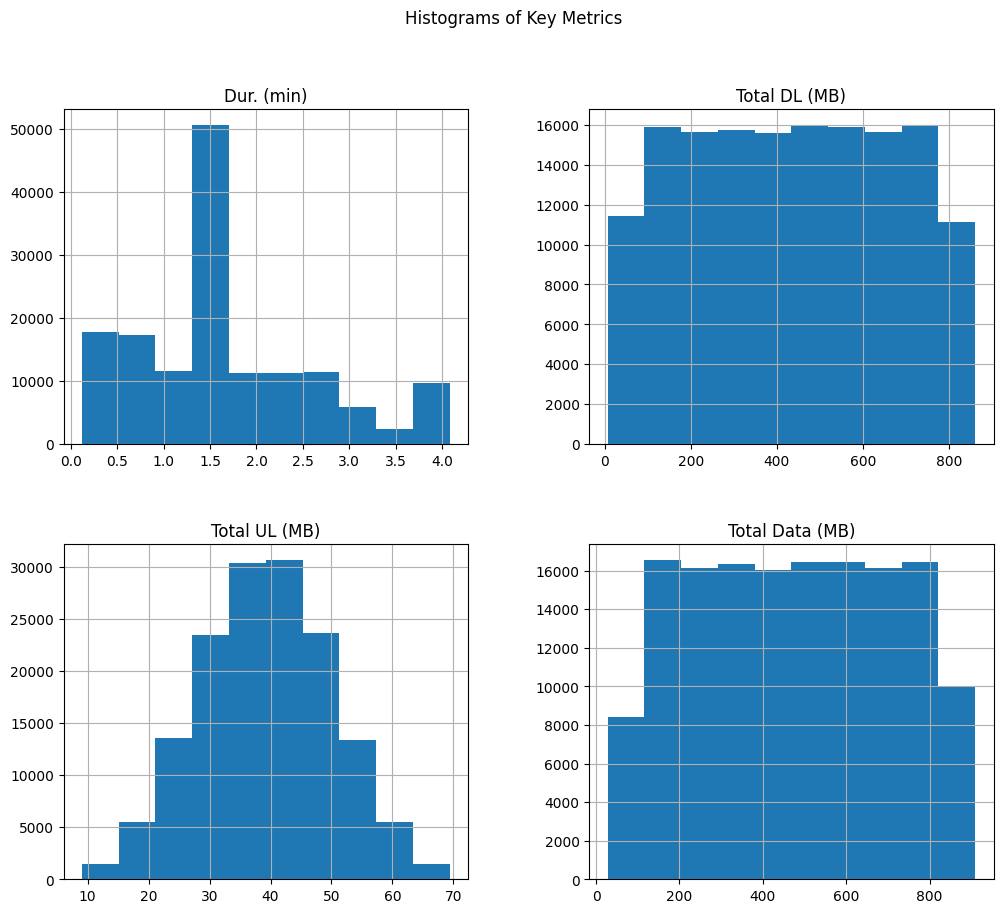

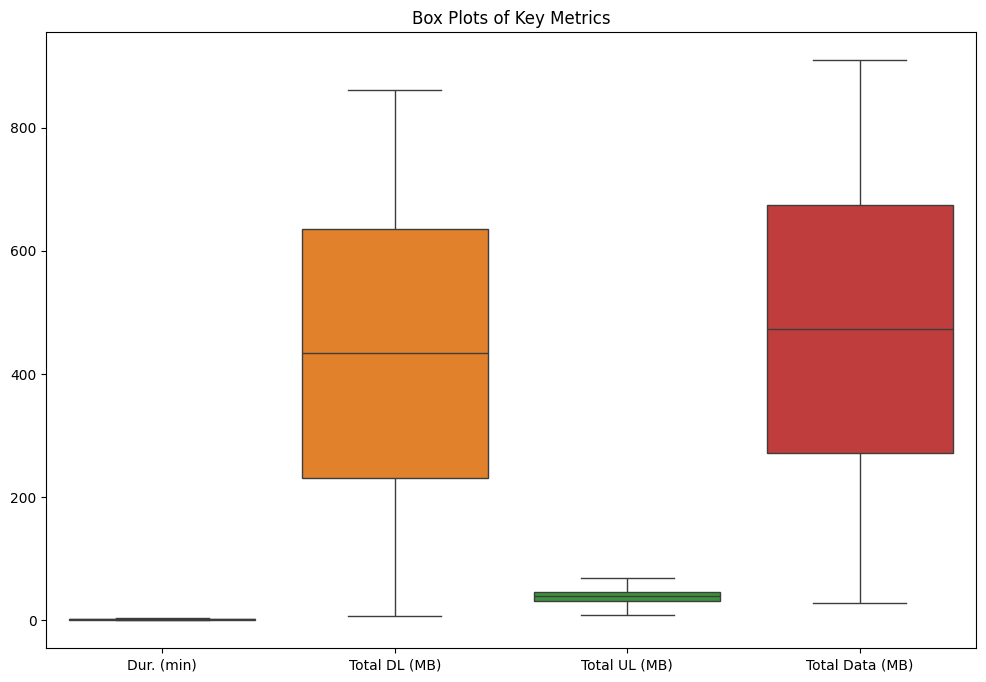

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df[['Dur. (min)', 'Total DL (MB)', 'Total UL (MB)', 'Total Data (MB)']].hist(figsize=(12, 10))
plt.suptitle('Histograms of Key Metrics')
plt.show()

# Box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Dur. (min)', 'Total DL (MB)', 'Total UL (MB)', 'Total Data (MB)']])
plt.title('Box Plots of Key Metrics')
plt.show()


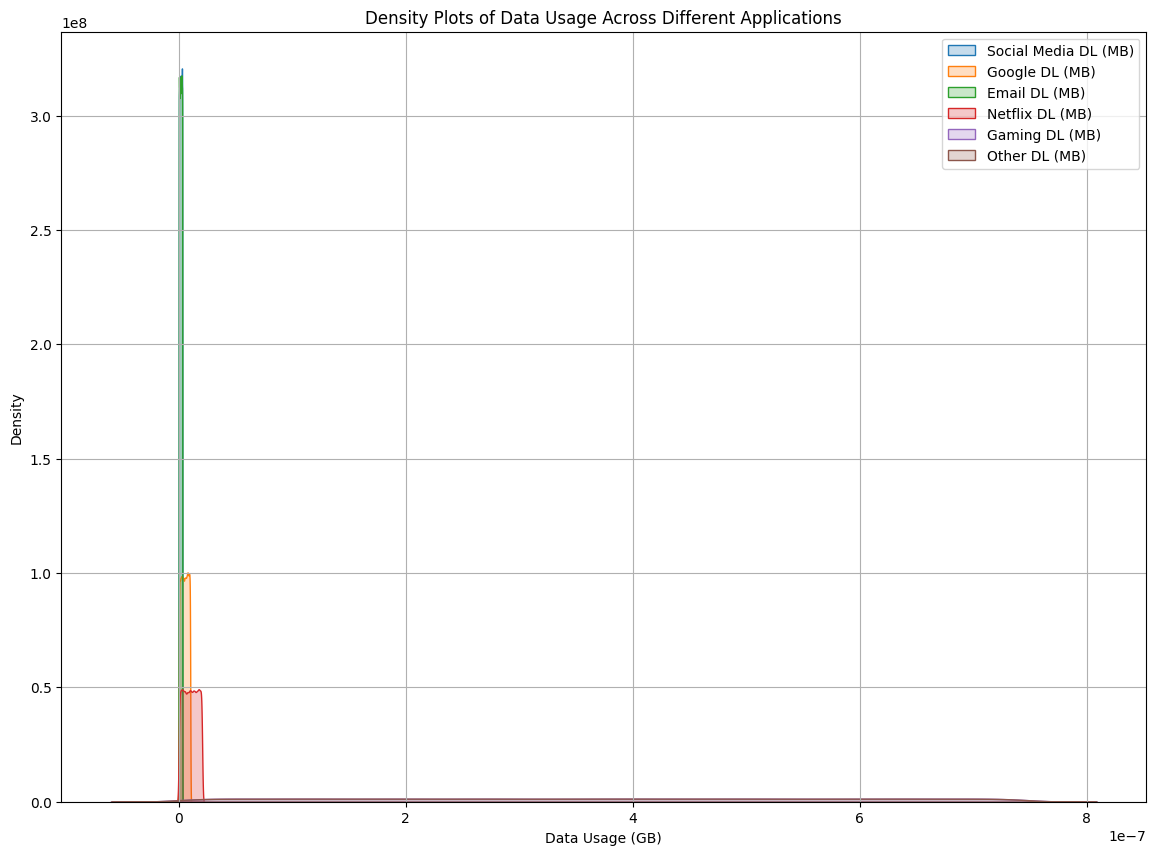

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns for data usage are in GB
# Convert MB to GB if needed
df[['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)']] *= 1 / 1024

# # Rename columns for clarity
# df.rename(columns={
#     'Social Media DL (MB)': 'Social Media DL (GB)',
#     'Google DL (MB)': 'Google DL (GB)',
#     'Email DL (MB)': 'Email DL (GB)',
#     'Youtube DL (MB)': 'YouTube DL (GB)',
#     'Netflix DL (MB)': 'Netflix DL (GB)',
#     'Gaming DL (MB)': 'Gaming DL (GB)',
#     'Other DL (MB)': 'Other DL (GB)'
# }, inplace=True)

# Plot density plots
plt.figure(figsize=(14, 10))

# Ensure that each column exists in the DataFrame
applications = ['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)', 'YouTube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)']
for app in applications:
    if app in df.columns:
        sns.kdeplot(data=df, x=app, fill=True, label=app)

plt.title('Density Plots of Data Usage Across Different Applications')
plt.xlabel('Data Usage (GB)')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


#### Bivariate Analysis

<Figure size 2000x1000 with 0 Axes>

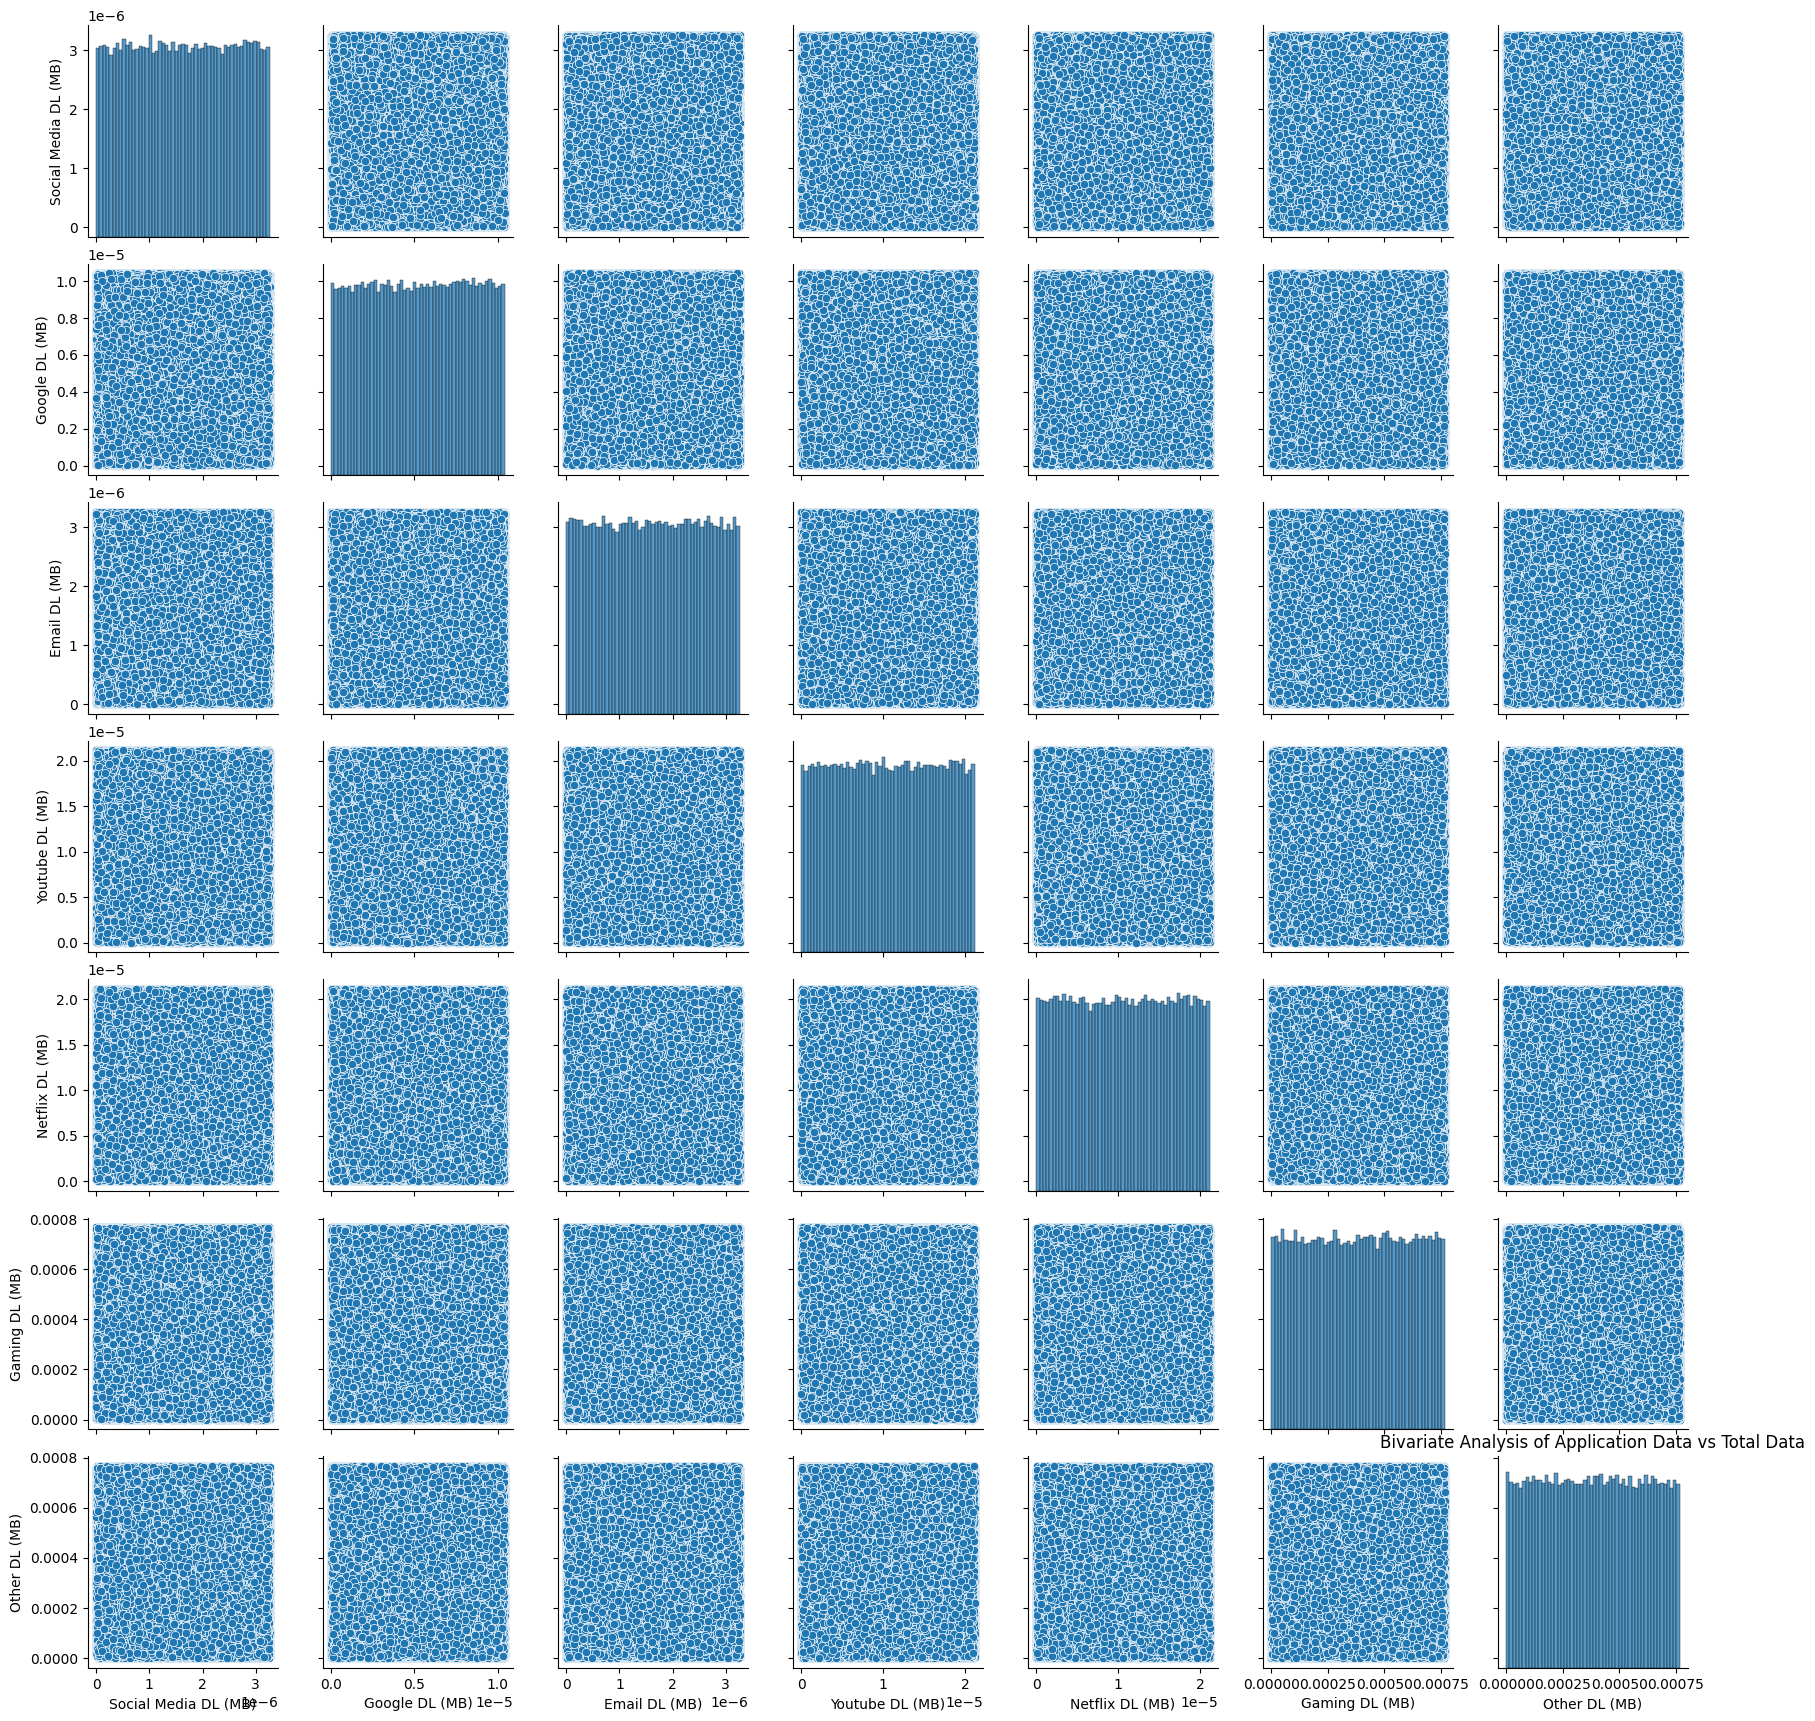

In [179]:


# Plot relationships
plt.figure(figsize=(20, 10))

# Create a scatter plot or pair plot for the relationship
sns.pairplot(df[['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)']])
plt.title('Bivariate Analysis of Application Data vs Total Data')
plt.show()


####  Correlation Analysis

In [180]:
# Compute correlation matrix
correlation_matrix = df[['Social Media DL (MB)', 'Google DL (MB)', 'Email DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)', 'Other DL (MB)']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                      Social Media DL (MB)  Google DL (MB)  Email DL (MB)  \
Social Media DL (MB)              1.000000       -0.002071       0.004902   
Google DL (MB)                   -0.002071        1.000000       0.000009   
Email DL (MB)                     0.004902        0.000009       1.000000   
Youtube DL (MB)                  -0.001181        0.002076       0.001475   
Netflix DL (MB)                  -0.001498        0.000962       0.001168   
Gaming DL (MB)                    0.001316       -0.001375       0.000069   
Other DL (MB)                     0.005903       -0.002596      -0.000251   

                      Youtube DL (MB)  Netflix DL (MB)  Gaming DL (MB)  \
Social Media DL (MB)        -0.001181        -0.001498        0.001316   
Google DL (MB)               0.002076         0.000962       -0.001375   
Email DL (MB)                0.001475         0.001168        0.000069   
Youtube DL (MB)              1.000000         0.001026       -0.001

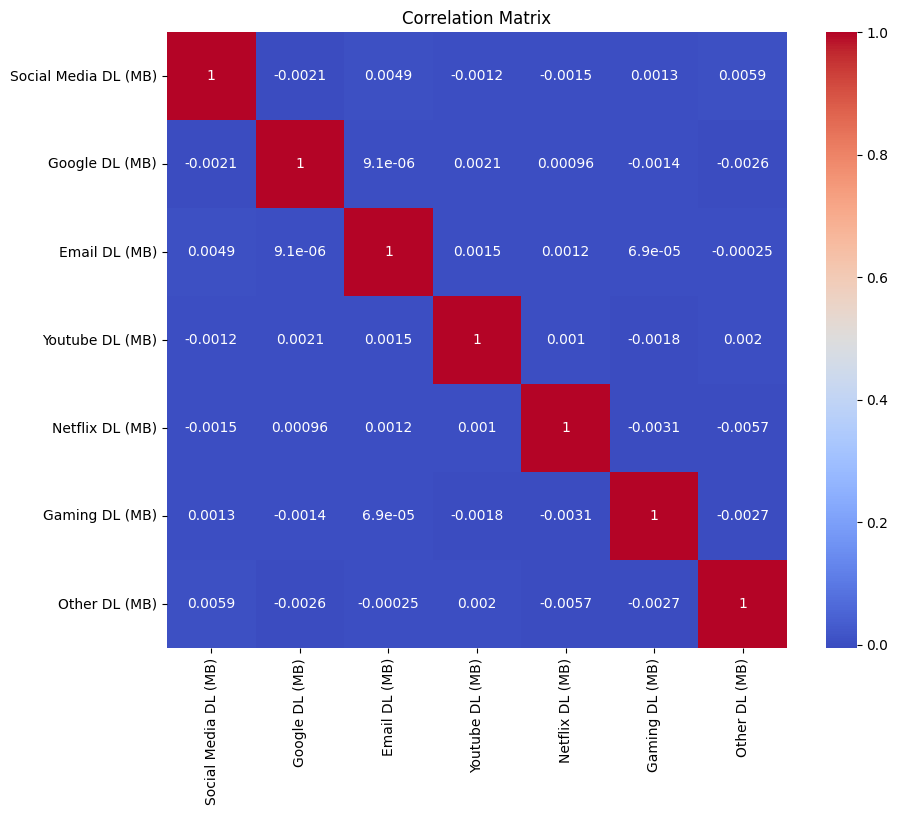

In [182]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Explained Variance Ratio:
[0.49995122 0.25038474]


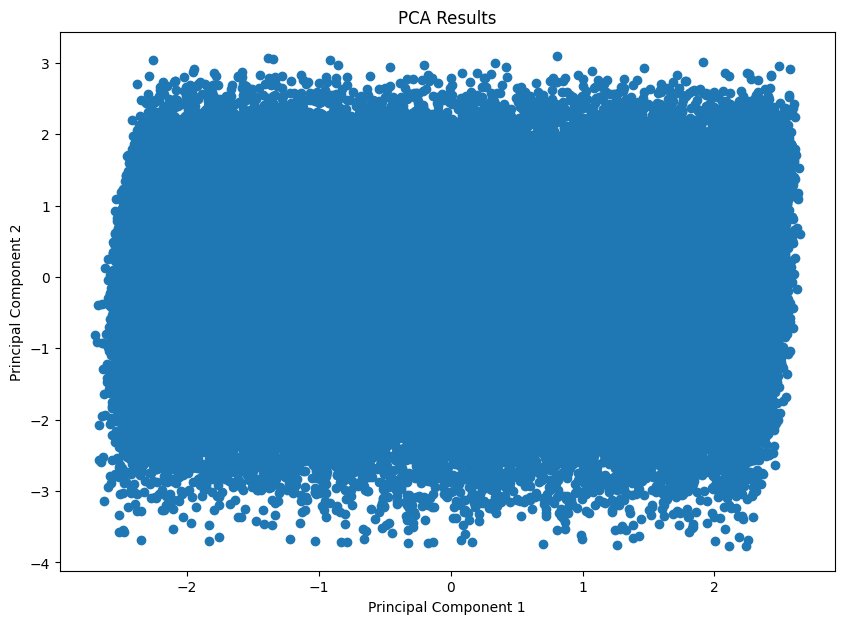

In [192]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select quantitative variables
quant_vars = df[['Dur. (min)', 'Total DL (MB)', 'Total UL (MB)', 'Total Data (MB)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(quant_vars)

# Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Print explained variance
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot PCA results
plt.figure(figsize=(10, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## Task 2 - User Engagement Analysis

### Aggregate Engagement Metrics Per Customer ID (MSISDN)

#### Session Frequency: Count how many sessions each customer has.
#### Session Duration: Sum the session durations for each customer.
#### Total Traffic: Sum the download and upload data for each customer

In [194]:
# Aggregating metrics per customer
df_agg = df.groupby('MSISDN/Number').agg(
    sessions_frequency=('Bearer Id', 'count'),
    total_session_duration=('Dur. (ms)', 'sum'),
    total_traffic=('Total Data (MB)', 'sum')  # Sum of download and upload
).reset_index()

# Top 10 customers per engagement metric
top10_sessions_frequency = df_agg.nlargest(10, 'sessions_frequency')
top10_session_duration = df_agg.nlargest(10, 'total_session_duration')
top10_total_traffic = df_agg.nlargest(10, 'total_traffic')

# Display the top 10 customers
print(top10_sessions_frequency)
print(top10_session_duration)
print(top10_total_traffic)


       MSISDN/Number  sessions_frequency  total_session_duration  \
89700   3.373178e+10               23317            2.364129e+09   
0       3.360300e+10                 813            7.613905e+07   
12925   3.362632e+10                  18            4.004780e+06   
5836    3.361489e+10                  17            3.897758e+06   
12579   3.362578e+10                  17            4.135464e+06   
36451   3.365973e+10                  16            3.490736e+06   
75762   3.367588e+10                  15            3.330388e+06   
64517   3.366716e+10                  13            3.112012e+06   
65      3.360313e+10                  12            2.853519e+06   
678     3.360452e+10                  12            2.778290e+06   

       total_traffic  
89700   1.096055e+07  
0       3.905983e+05  
12925   7.601897e+03  
5836    8.436419e+03  
12579   8.105870e+03  
36451   7.348883e+03  
75762   7.525550e+03  
64517   5.358118e+03  
65      4.745669e+03  
678     5.233627e+03 

### Aggregate Metrics per Customer in Table Format

In [206]:
from tabulate import tabulate
# Display the top 10 customers for each engagement metric in table format
print("Top 10 Customers by Session Frequency:")
print(tabulate(top10_sessions_frequency, headers='keys', tablefmt='fancy_grid'))

print("\nTop 10 Customers by Session Duration:")
print(tabulate(top10_session_duration, headers='keys', tablefmt='fancy_grid'))

print("\nTop 10 Customers by Total Traffic:")
print(tabulate(top10_total_traffic, headers='keys', tablefmt='fancy_grid'))

Top 10 Customers by Session Frequency:
╒═══════╤═════════════════╤══════════════════════╤══════════════════════════╤══════════════════╕
│       │   MSISDN/Number │   sessions_frequency │   total_session_duration │    total_traffic │
╞═══════╪═════════════════╪══════════════════════╪══════════════════════════╪══════════════════╡
│ 89700 │     3.37318e+10 │                23317 │              2.36413e+09 │      1.09605e+07 │
├───────┼─────────────────┼──────────────────────┼──────────────────────────┼──────────────────┤
│     0 │     3.3603e+10  │                  813 │              7.61391e+07 │ 390598           │
├───────┼─────────────────┼──────────────────────┼──────────────────────────┼──────────────────┤
│ 12925 │     3.36263e+10 │                   18 │              4.00478e+06 │   7601.9         │
├───────┼─────────────────┼──────────────────────┼──────────────────────────┼──────────────────┤
│  5836 │     3.36149e+10 │                   17 │              3.89776e+06 │   8436.42 

### Normalizing the Metrics

In [195]:
from sklearn.preprocessing import MinMaxScaler

# Select the engagement metrics
metrics = df_agg[['sessions_frequency', 'total_session_duration', 'total_traffic']]

# Normalize the data
scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(metrics)

# Add normalized metrics to dataframe
df_agg[['norm_sessions_frequency', 'norm_total_session_duration', 'norm_total_traffic']] = normalized_metrics


 ### K-Means Clustering (k=3)

In [196]:
from sklearn.cluster import KMeans

# Perform K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
df_agg['cluster'] = kmeans.fit_predict(normalized_metrics)

# Aggregate results by cluster
cluster_summary = df_agg.groupby('cluster').agg(
    min_sessions_frequency=('sessions_frequency', 'min'),
    max_sessions_frequency=('sessions_frequency', 'max'),
    avg_sessions_frequency=('sessions_frequency', 'mean'),
    total_sessions_frequency=('sessions_frequency', 'sum'),
    min_total_session_duration=('total_session_duration', 'min'),
    max_total_session_duration=('total_session_duration', 'max'),
    avg_total_session_duration=('total_session_duration', 'mean'),
    total_total_session_duration=('total_session_duration', 'sum'),
    min_total_traffic=('total_traffic', 'min'),
    max_total_traffic=('total_traffic', 'max'),
    avg_total_traffic=('total_traffic', 'mean'),
    total_total_traffic=('total_traffic', 'sum')
)

print(cluster_summary)


         min_sessions_frequency  max_sessions_frequency  \
cluster                                                   
0                             1                      18   
1                         23317                   23317   
2                           813                     813   

         avg_sessions_frequency  total_sessions_frequency  \
cluster                                                     
0                      1.391376                    124805   
1                  23317.000000                     23317   
2                    813.000000                       813   

         min_total_session_duration  max_total_session_duration  \
cluster                                                           
0                      7.146000e+03                4.135464e+06   
1                      2.364129e+09                2.364129e+09   
2                      7.613905e+07                7.613905e+07   

         avg_total_session_duration  total_total_session_durat

### Visualize clusters

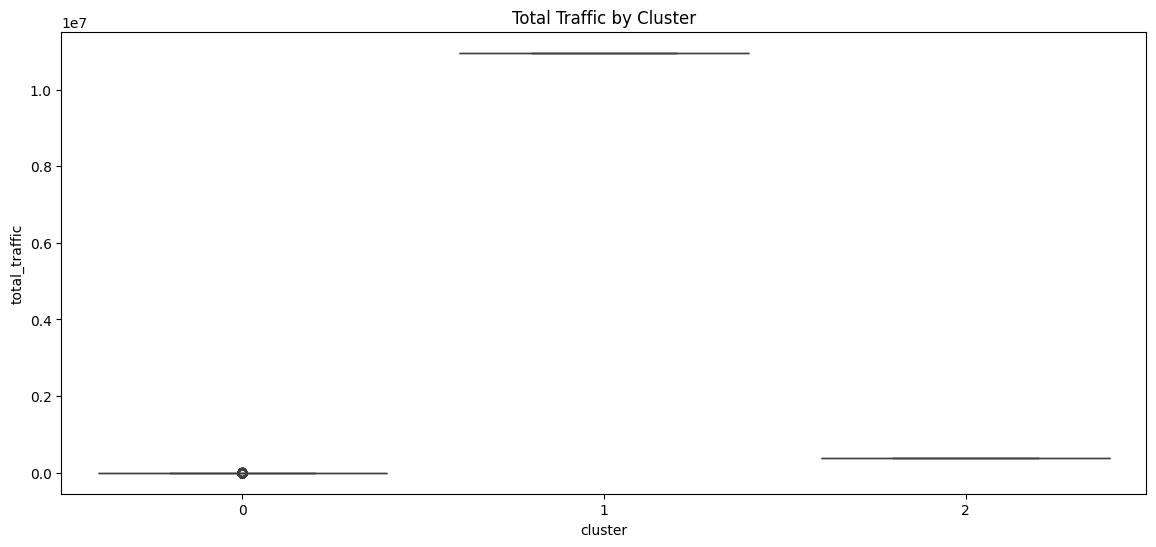

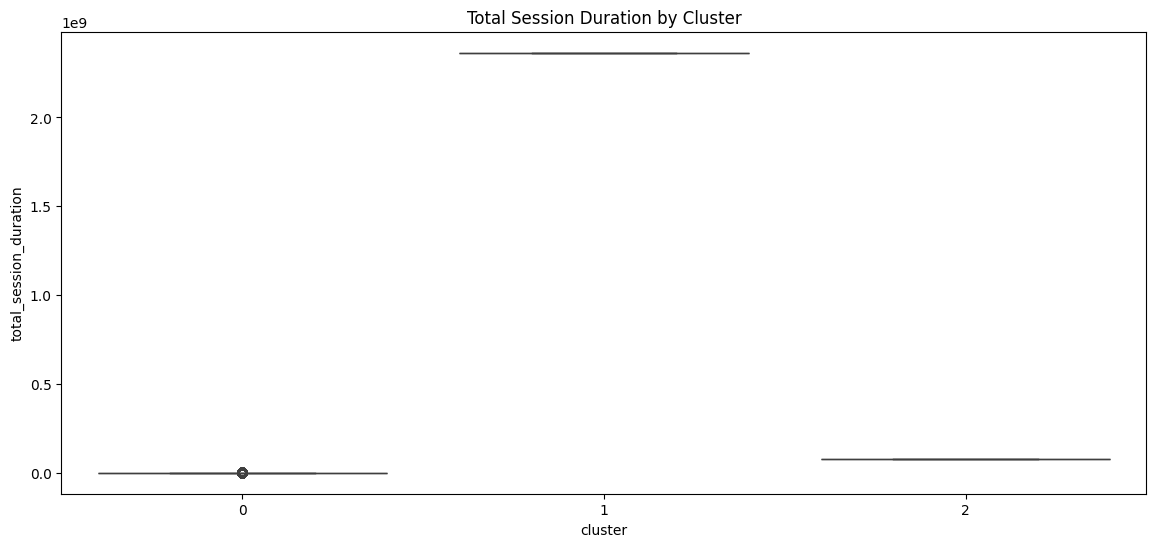

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize clusters
plt.figure(figsize=(14, 6))
sns.boxplot(x='cluster', y='total_traffic', data=df_agg)
plt.title('Total Traffic by Cluster')
plt.show()

# Other visualizations
plt.figure(figsize=(14, 6))
sns.boxplot(x='cluster', y='total_session_duration', data=df_agg)
plt.title('Total Session Duration by Cluster')
plt.show()


### Display Cluster Summary in a Table

In [208]:
# Display cluster summary in a table format
print("\nCluster Summary:")
print(tabulate(cluster_summary, headers='keys', tablefmt='fancy_grid'))


Cluster Summary:
╒═══════════╤══════════════════════════╤══════════════════════════╤══════════════════════════╤════════════════════════════╤══════════════════════════════╤══════════════════════════════╤══════════════════════════════╤════════════════════════════════╤═════════════════════╤═════════════════════╤═════════════════════╤═══════════════════════╕
│   cluster │   min_sessions_frequency │   max_sessions_frequency │   avg_sessions_frequency │   total_sessions_frequency │   min_total_session_duration │   max_total_session_duration │   avg_total_session_duration │   total_total_session_duration │   min_total_traffic │   max_total_traffic │   avg_total_traffic │   total_total_traffic │
╞═══════════╪══════════════════════════╪══════════════════════════╪══════════════════════════╪════════════════════════════╪══════════════════════════════╪══════════════════════════════╪══════════════════════════════╪════════════════════════════════╪═════════════════════╪═════════════════════╪═════════

### Aggregate User Traffic by Application

In [200]:
# Aggregate traffic by customer and application
app_columns = ['Social Media DL (MB)', 'Google DL (MB)', 'Youtube DL (MB)', 'Netflix DL (MB)', 'Gaming DL (MB)','Email DL (MB)']
df_app_agg = df.groupby('MSISDN/Number')[app_columns].sum()

# Find the top 10 users for each application
top10_app_users = df_app_agg.apply(lambda x: x.nlargest(10))

# Display the results
print(top10_app_users)


               Social Media DL (MB)  Google DL (MB)  Youtube DL (MB)  \
MSISDN/Number                                                          
3.360300e+10           1.299883e-06    4.198284e-06     8.261650e-06   
3.360313e+10           2.022975e-08    6.567374e-08     1.411997e-07   
3.360452e+10                    NaN             NaN              NaN   
3.361489e+10           2.464672e-08    8.343700e-08     1.774789e-07   
3.362578e+10           2.359368e-08    9.583866e-08     2.112826e-07   
3.362632e+10           3.796415e-08    1.031232e-07     1.457045e-07   
3.362708e+10                    NaN             NaN     1.663765e-07   
3.365849e+10           2.015781e-08             NaN              NaN   
3.365973e+10           3.099782e-08    8.078742e-08              NaN   
3.366021e+10                    NaN    6.343526e-08              NaN   
3.366471e+10                    NaN             NaN     1.359575e-07   
3.366546e+10                    NaN             NaN             

### Bar Chart for Top 10 Users for Each Application

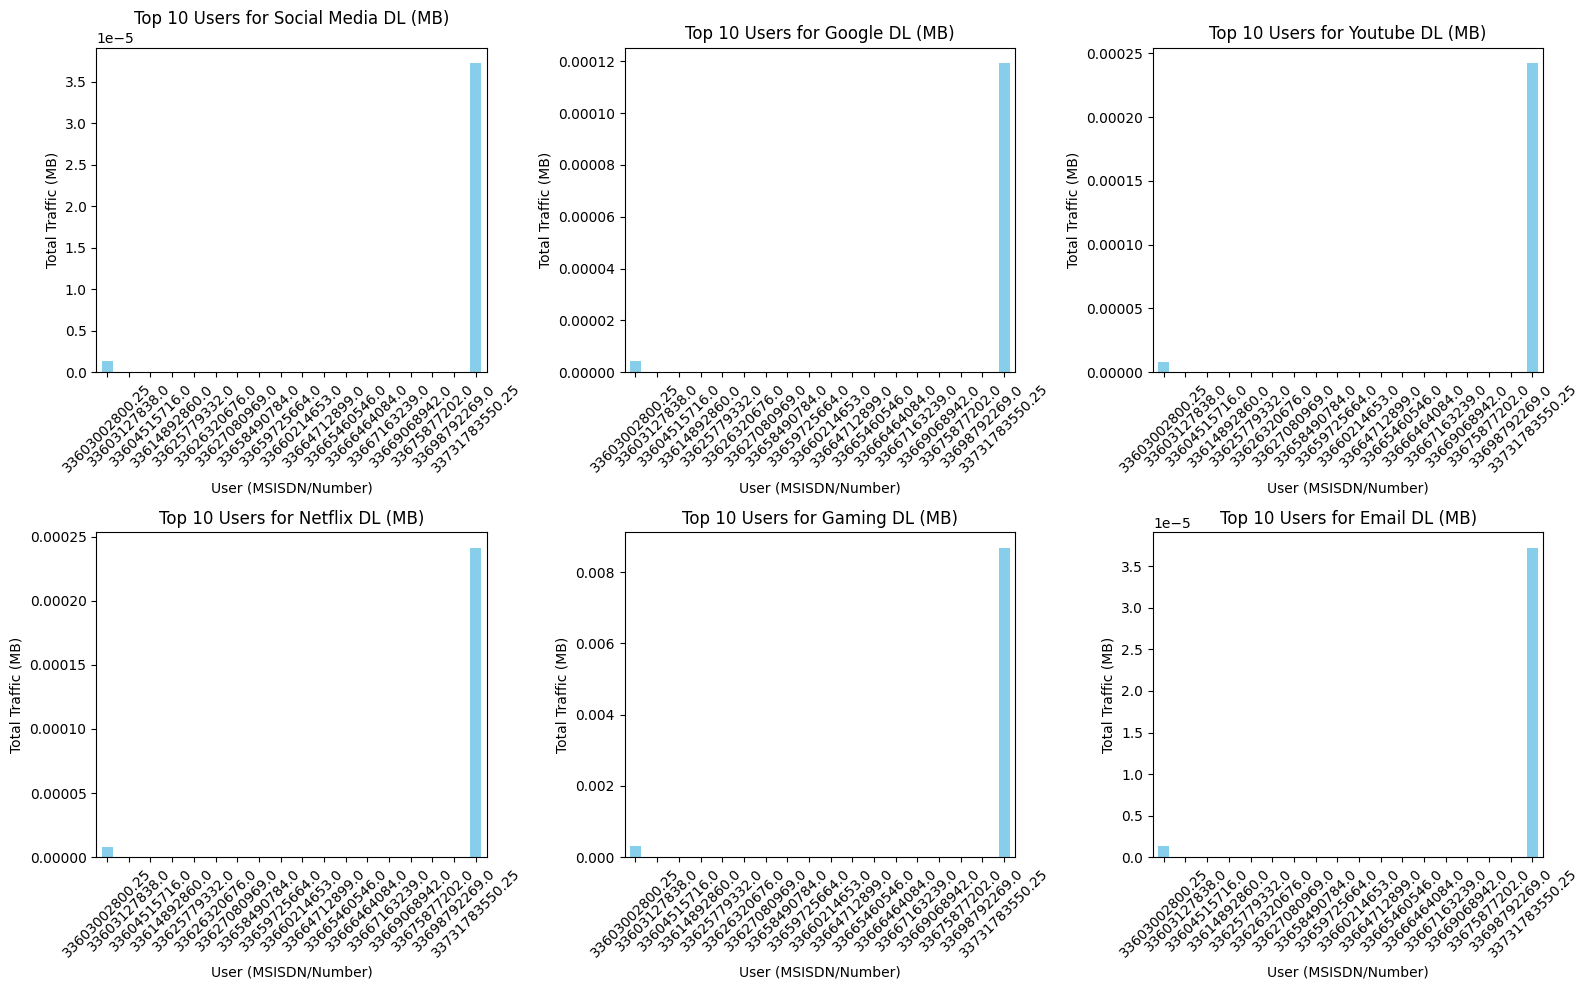

In [209]:
# Plot bar charts for each application with the top 10 users
plt.figure(figsize=(16, 10))

# Loop through each application and create a subplot
for i, app in enumerate(app_columns, 1):
    plt.subplot(2, 3, i)
    top_users = top10_app_users[app]
    top_users.plot(kind='bar', color='skyblue')
    plt.title(f'Top 10 Users for {app}')
    plt.xlabel('User (MSISDN/Number)')
    plt.ylabel('Total Traffic (MB)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Heatmap of Top 10 Users by Application

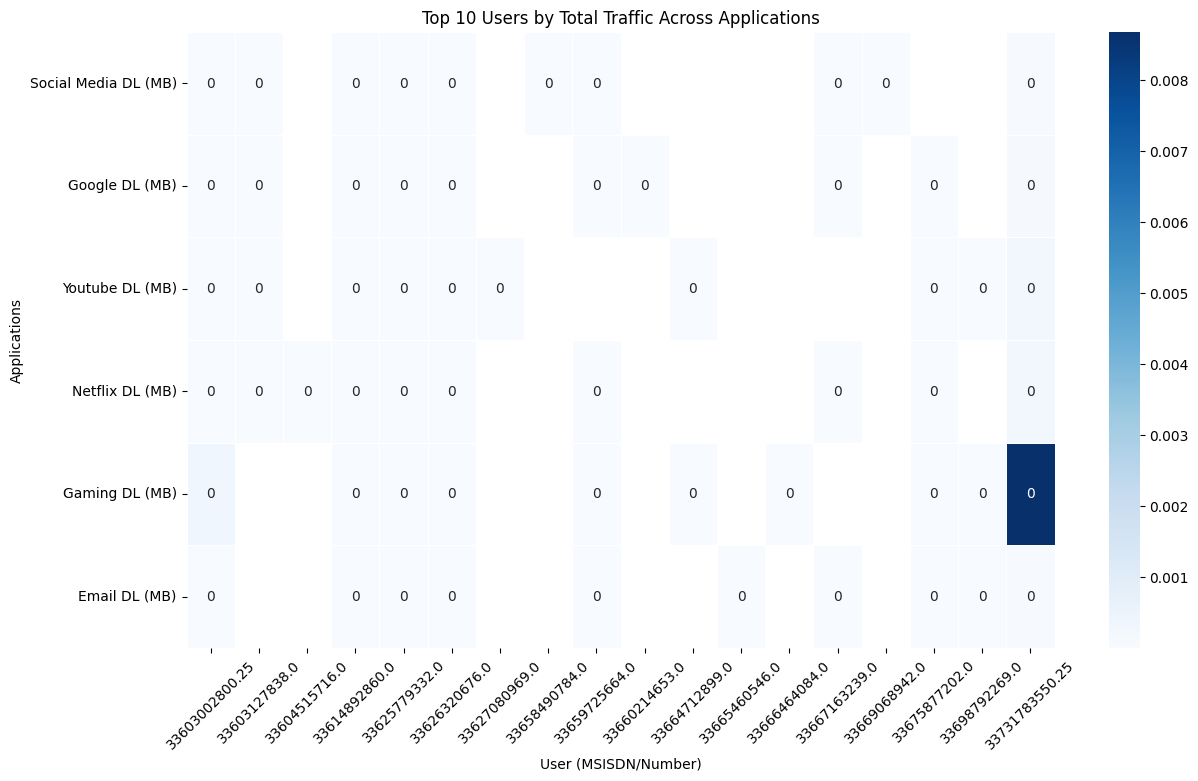

In [210]:


# Create a heatmap for the top 10 users by application
plt.figure(figsize=(14, 8))
sns.heatmap(top10_app_users.T, annot=True, cmap="Blues", fmt=".0f", linewidths=.5)

plt.title('Top 10 Users by Total Traffic Across Applications')
plt.xlabel('User (MSISDN/Number)')
plt.ylabel('Applications')
plt.xticks(rotation=45)
plt.show()


### Visualize the Top 3 Most Used Applications

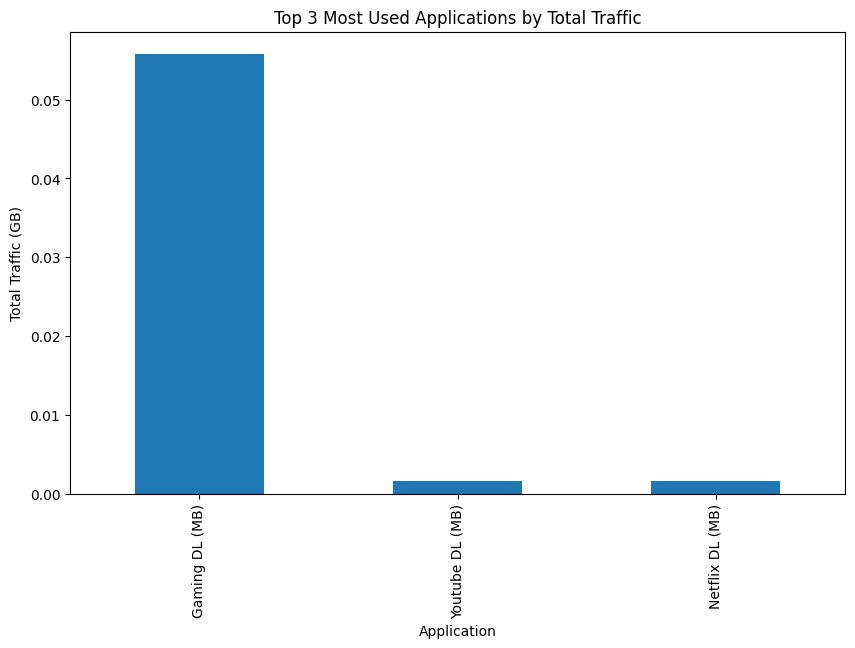

In [201]:
# Identify the top 3 most used applications
top3_apps = df_app_agg.sum().nlargest(3).index

# Plot bar chart for top 3 applications
df_app_agg[top3_apps].sum().plot(kind='bar', figsize=(10, 6))
plt.title('Top 3 Most Used Applications by Total Traffic')
plt.xlabel('Application')
plt.ylabel('Total Traffic (GB)')
plt.show()


### Optimal Value of k Using Elbow Method

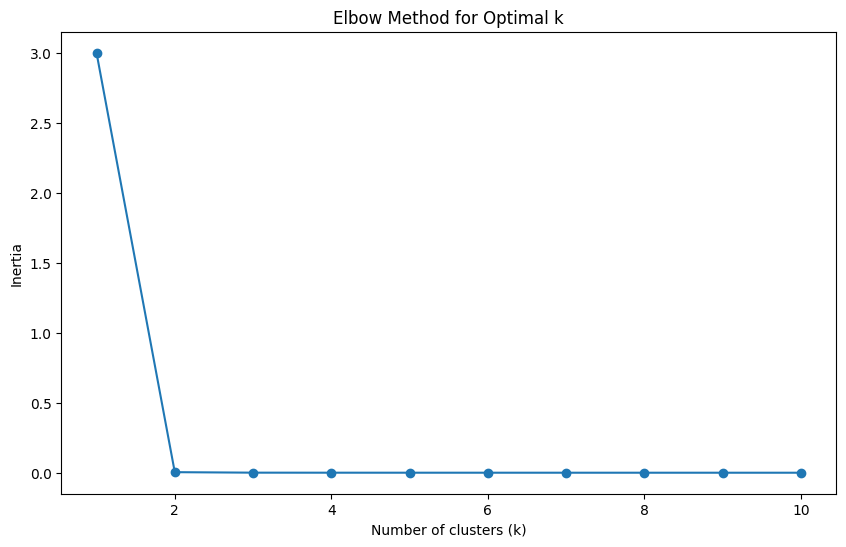

In [202]:
# Use the Elbow method to find optimal k
from sklearn.cluster import KMeans
inertia = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(normalized_metrics)
    inertia.append(kmeans.inertia_)

# Plot the inertia curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Task 3

### Aggregating Customer Information

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148935 entries, 0 to 149999
Data columns (total 47 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Bearer Id                       148935 non-null  float64       
 1   Start                           148935 non-null  datetime64[ns]
 2   Start ms                        148935 non-null  float64       
 3   End                             148935 non-null  datetime64[ns]
 4   End ms                          148935 non-null  float64       
 5   Dur. (ms)                       148935 non-null  float64       
 6   IMSI                            148935 non-null  float64       
 7   MSISDN/Number                   148935 non-null  float64       
 8   IMEI                            148935 non-null  float64       
 9   Last Location Name              148935 non-null  object        
 10  Avg RTT DL (ms)                 148935 non-null  float64     

In [222]:
df.isna().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [223]:
# Aggregate per customer (MSISDN/Number)
df_agg = df.groupby('MSISDN/Number').agg(
    avg_tcp_retransmission=('DL TP < 50 Kbps (%)', 'mean'),  # TCP retransmission can be modeled by low throughput values
    avg_rtt=('Avg RTT DL (ms)', 'mean'),
    handset_type=('Handset Type', 'first'),
    avg_throughput=('Avg Bearer TP DL (kbps)', 'mean')
).reset_index()

# Display the aggregated results
print(df_agg.head())

   MSISDN/Number  avg_tcp_retransmission     avg_rtt  \
0   3.360300e+10               95.469198   68.735098   
1   3.360301e+10               98.500000   66.612370   
2   3.360301e+10              100.000000  108.224741   
3   3.360301e+10              100.000000   20.000000   
4   3.360301e+10              100.000000   25.000000   

                       handset_type  avg_throughput  
0        Samsung Galaxy A5 Sm-A520F     8854.586716  
1  Samsung Galaxy Note 8 (Sm-N950F)     3727.500000  
2      Samsung Galaxy S7 (Sm-G930X)        6.000000  
3            Apple iPhone X (A1901)       61.000000  
4            Apple iPhone 7 (A1778)       23.000000  


#### Task 3.2 - Top, Bottom, and Most Frequent Values for TCP, RTT, and Throughput

In [224]:
# Top 10, Bottom 10, and Most Frequent TCP retransmission
top_10_tcp = df['DL TP < 50 Kbps (%)'].nlargest(10)
bottom_10_tcp = df['DL TP < 50 Kbps (%)'].nsmallest(10)
most_frequent_tcp = df['DL TP < 50 Kbps (%)'].value_counts().head(10)

# Top 10, Bottom 10, and Most Frequent RTT values
top_10_rtt = df['Avg RTT DL (ms)'].nlargest(10)
bottom_10_rtt = df['Avg RTT DL (ms)'].nsmallest(10)
most_frequent_rtt = df['Avg RTT DL (ms)'].value_counts().head(10)

# Top 10, Bottom 10, and Most Frequent Throughput values
top_10_throughput = df['Avg Bearer TP DL (kbps)'].nlargest(10)
bottom_10_throughput = df['Avg Bearer TP DL (kbps)'].nsmallest(10)
most_frequent_throughput = df['Avg Bearer TP DL (kbps)'].value_counts().head(10)

# Print results
print("Top 10 TCP Retransmission Values:", top_10_tcp)
print("Bottom 10 TCP Retransmission Values:", bottom_10_tcp)
print("Most Frequent TCP Retransmission Values:", most_frequent_tcp)

print("Top 10 RTT Values:", top_10_rtt)
print("Bottom 10 RTT Values:", bottom_10_rtt)
print("Most Frequent RTT Values:", most_frequent_rtt)

print("Top 10 Throughput Values:", top_10_throughput)
print("Bottom 10 Throughput Values:", bottom_10_throughput)
print("Most Frequent Throughput Values:", most_frequent_throughput)


Top 10 TCP Retransmission Values: 0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
8     100.0
10    100.0
12    100.0
Name: DL TP < 50 Kbps (%), dtype: float64
Bottom 10 TCP Retransmission Values: 9      77.5
11     77.5
14     77.5
61     77.5
82     77.5
84     77.5
85     77.5
101    77.5
140    77.5
147    77.5
Name: DL TP < 50 Kbps (%), dtype: float64
Most Frequent TCP Retransmission Values: DL TP < 50 Kbps (%)
100.0    86680
77.5     18185
99.0      5449
98.0      3696
97.0      2890
96.0      2488
95.0      2260
94.0      2127
93.0      2026
92.0      1987
Name: count, dtype: int64
Top 10 RTT Values: 20     218.061851
30     218.061851
68     218.061851
154    218.061851
165    218.061851
351    218.061851
385    218.061851
420    218.061851
467    218.061851
470    218.061851
Name: Avg RTT DL (ms), dtype: float64
Bottom 10 RTT Values: 42612     0.0
52225     0.0
60152     0.0
61152     0.0
61345     0.0
103328    0.0
124544    0.0
142526    0

#### Task 3.3 - Distribution of Throughput and TCP Retransmission per Handset Type

#### Throughput Distribution per Handset Type:

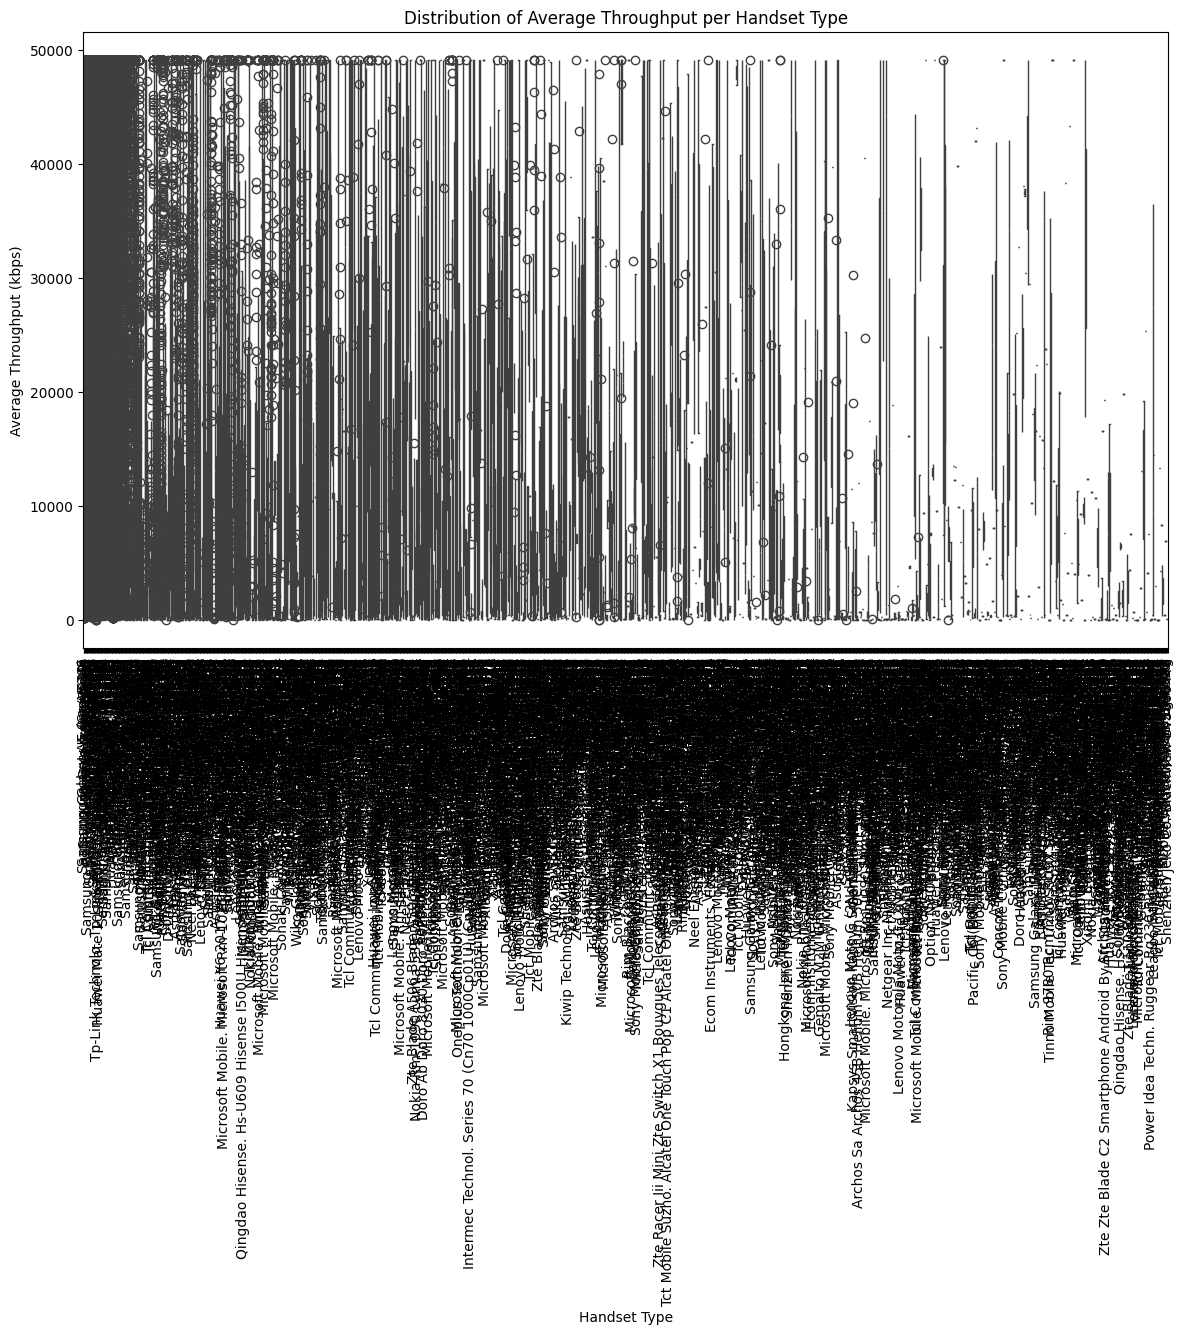

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of average throughput per handset type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Handset Type', y='Avg Bearer TP DL (kbps)', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Average Throughput per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('Average Throughput (kbps)')
plt.show()


#### TCP Retransmission View per Handset Type:

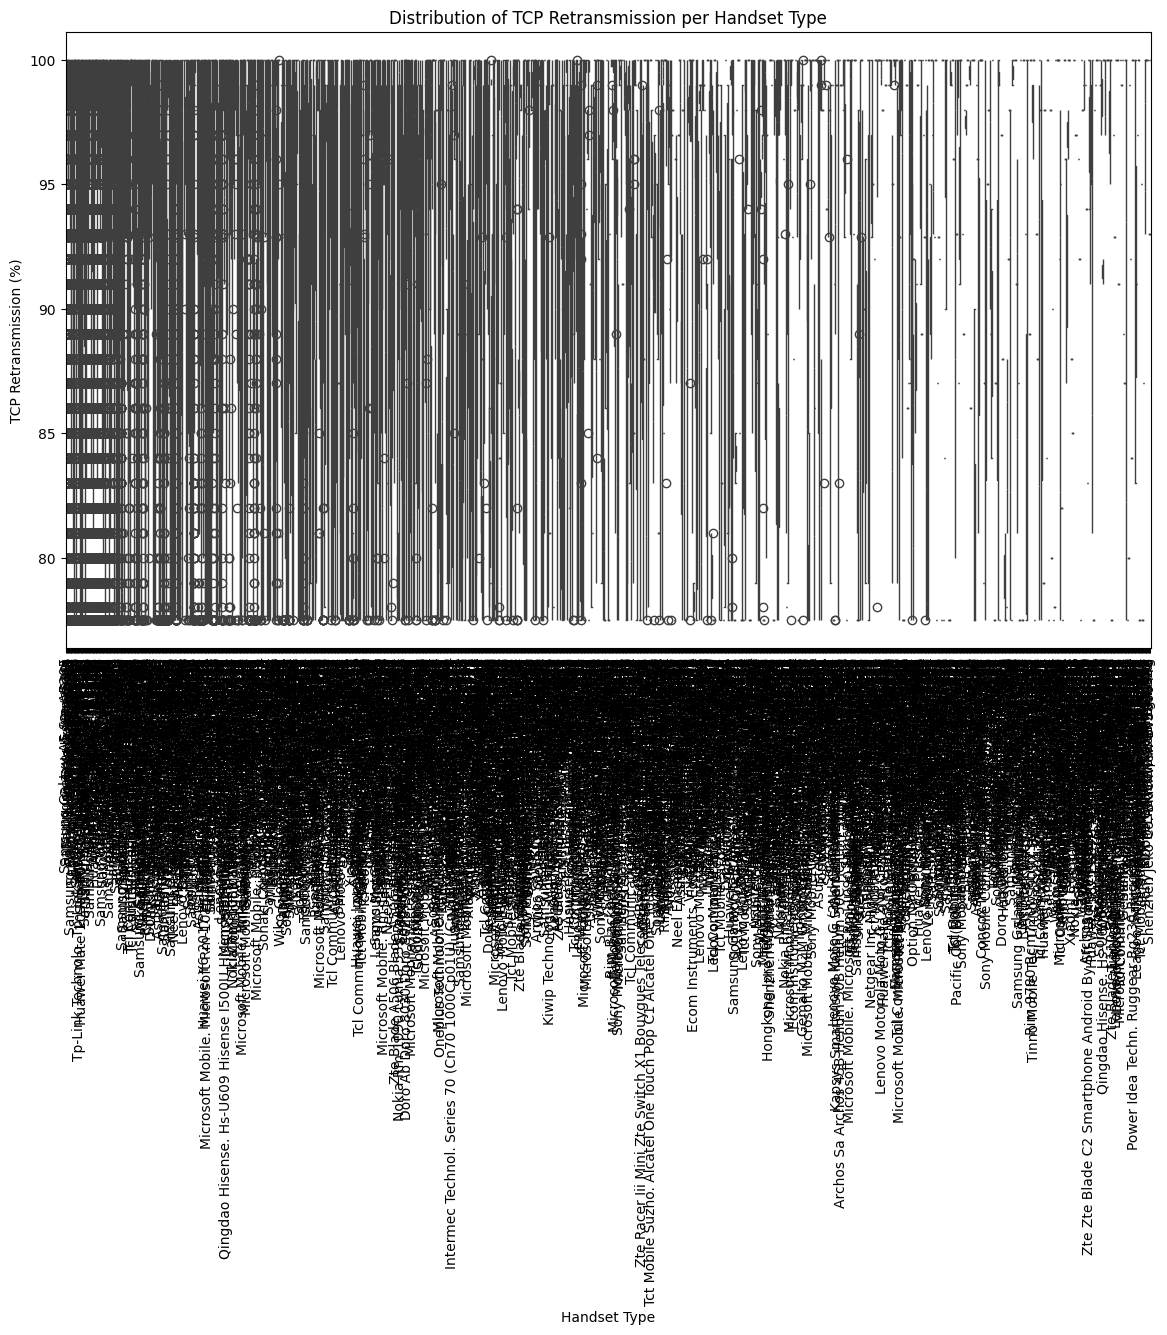

In [226]:
# Distribution of TCP retransmission per handset type
plt.figure(figsize=(14, 8))
sns.boxplot(x='Handset Type', y='DL TP < 50 Kbps (%)', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of TCP Retransmission per Handset Type')
plt.xlabel('Handset Type')
plt.ylabel('TCP Retransmission (%)')
plt.show()


#### Task 3.4 - K-Means Clustering for User Segmentation

   cluster  avg_tcp_retransmission     avg_rtt  avg_throughput  count
0        0               99.081839   60.580461     1969.626029  61063
1        1               84.794874   63.225366    32576.962141  20597
2        2               92.135991  197.846367     9415.993296   8041


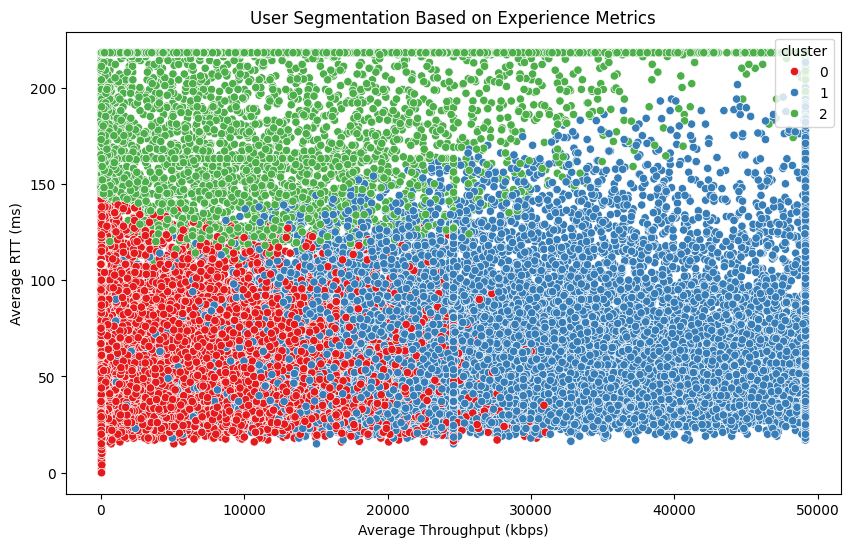

In [227]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select relevant columns for clustering
X = df_agg[['avg_tcp_retransmission', 'avg_rtt', 'avg_throughput']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering (k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
df_agg['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze each cluster
cluster_summary = df_agg.groupby('cluster').agg(
    avg_tcp_retransmission=('avg_tcp_retransmission', 'mean'),
    avg_rtt=('avg_rtt', 'mean'),
    avg_throughput=('avg_throughput', 'mean'),
    count=('MSISDN/Number', 'count')
).reset_index()

# Print cluster summary
print(cluster_summary)

# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='avg_throughput', y='avg_rtt', hue='cluster', data=df_agg, palette='Set1')
plt.title('User Segmentation Based on Experience Metrics')
plt.xlabel('Average Throughput (kbps)')
plt.ylabel('Average RTT (ms)')
plt.show()


#### Elbow Method for Optimal K

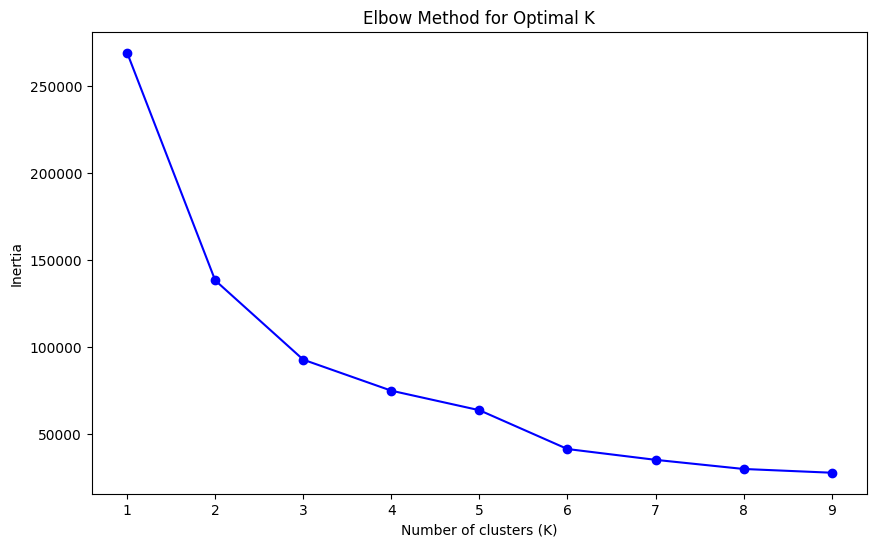

In [231]:
# Elbow method to determine optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.show()
